# 1. 이미지 세그멘테이션(Image Segmentation) 소개

Image Segmentation은 컴퓨터 비전의 핵심 기술로, 딥러닝 발전 과정에서 다음 단계를 거쳐왔습니다.

1. Image Classification

    - 이미지 내 객체의 클래스 분류
    - Output: "이 이미지는 강아지입니다."

2. Object Detection

    - 객체의 위치를 bounding box로 탐지
    - Output: "강아지가 (x,y) 위치에 있습니다"

3. Image Segmentation

    - 픽셀 단위로 객체를 구분
    - Output: "강아지의 정확한 윤곽선을 pixel-level로 구분"

그래서, 이미지 세그멘테이션(Image Segmentation)의 주요 특징으로는 Pixel-level 분석으로 정확한 객체 경계 파악이 가능하고, 복잡한 장면에서도 세부적인 분석 가능하다는 특징이 있습니다.

<img src="https://cdn.prod.website-files.com/614c82ed388d53640613982e/64aeb4365bb24b8f541580d0_panoptic%20segmentation.webp">

# 2. 이미지 세그멘테이션(Image Segmentation) 종류

<img src="https://images.prismic.io/encord/9411df89-27df-4931-8f40-3b47e3422269_Panoptic+Segmentation+vs+Semantic+Segmentation.png?auto=compress,format">

<img src="https://www.labellerr.com/blog/content/images/size/w2000/2022/12/banner-2-1.webp">

### 2.1 Semantic Segmentation


- 이미지의 모든 픽셀을 의미론적 클래스로 분류하는 방식
- 동일한 클래스의 여러 객체를 구분하지 않고 하나의 카테고리로 처리
- 예시: 여러 대의 자동차가 있어도 모두 "자동차" 라는 하나의 클래스로 분류
- Model: SegNet, U-Net, DeconvNet, and FCNs

<img src="https://b2633864.smushcdn.com/2633864/wp-content/uploads/2022/06/semantic-segmentation.png?lossy=2&strip=1&webp=1">

    - Semantic segmentation examples (source: SegNet).

### 2.2 Instance Segmentation

- 같은 클래스 내의 개별 객체를 구분하여 식별
- 각 객체 인스턴스에 고유한 ID를 부여
- 예시: 3대의 자동차를 "자동차_1", "자동차_2", "자동차_3"으로 구분
- 주로 countable한 객체(things)에 초점
- Model: Mask R-CNN, Faster R-CNN, PANet, and YOLACT

<img src="https://b2633864.smushcdn.com/2633864/wp-content/uploads/2022/06/instance-segmentation.png?lossy=2&strip=1&webp=1">

    - Instance segmentation examples (source: Mask R-CNN).

### 2.3 Panoptic Segmentation

- Semantic과 Instance Segmentation의 장점을 결합한 통합적 접근 방식
- 모든 픽셀에 두 가지 레이블을 할당:
    - Semantic 레이블 (클래스 정보)
    - Instance ID (개별 객체 식별자)

- 객체를 두 카테고리로 구분:
    - things: 셀 수 있는 객체 (자동차, 사람 등)
    - stuff: 비정형 영역 (하늘, 도로, 잔디 등)
- Model: UPSNet, FPSNet, EPSNet, and VPSNet.

<img src="https://b2633864.smushcdn.com/2633864/wp-content/uploads/2022/06/panoptic-segmentation-2.png?lossy=2&strip=1&webp=1">

    - Panoptic segmentation examples (source: FPSNet).

### 2.4 주요 차이점

- 처리 방식
    - Semantic: 픽셀 단위 클래스 분류만 수행
    - Instance: 객체 단위 구분에 중점
    - Panoptic: 두 가지 접근 방식을 통합

# 3. Segmentation Segmentation Evaluation Metrics

### 3.1 IoU (Intersection over Union)

**Intersection over Union (IoU)**는 예측된 영역과 실제 영역(Ground Truth, GT) 간의 겹치는 정도를 측정하는 평가 지표로, Semantic Segmentation과 Object Detection에서 주로 사용됩니다.

- 정의

    - IoU는 예측된 영역과 GT의 교집합(겹치는 영역)을 두 영역의 합집합으로 나눈 값입니다. 계산식은 다음과 같습니다

        ```
        IoU = (Intersection Area) / (Union Area)
        ```

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbqplKb%2FbtqXwci0Fkf%2F7kVk8XartX73ZrB7wkmiZ1%2Fimg.png">

- 범위
    - IoU 값은 0에서 1 사이의 범위를 가지며, 값이 1에 가까울수록 예측이 정확하게 GT와 일치함을 의미합니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fmwf3e%2FbtqXyMqw6GK%2FgStQGib9wg7S3AZ1ZLaIt0%2Fimg.png">

- mIoU (mean IoU)

    - 여러 클래스가 존재하는 경우, 각 클래스의 IoU를 계산한 후 그 평균값을 취하여 전체 모델 성능을 평가합니다. mIoU는 모델이 다양한 클래스에서 얼마나 정확하게 예측을 수행했는지를 종합적으로 나타냅니다.


IoU는 모델의 정밀도를 측정할 때 유용하지만, False Positive (FP)와 False Negative (FN)를 세부적으로 구분하지 않기 때문에 복잡한 경우의 오류 식별에는 제한적일 수 있습니다.

### 3.2 AP (Average Precision)

**Average Precision (AP)**는 Precision-Recall Curve에서 모델 성능을 평가하는 지표로, 주로 Object Detection에서 사용됩니다.

- 정의
    - Precision-Recall Curve에서 특정 임계값을 기준으로 예측된 인스턴스들이 얼마나 정확하게 GT와 일치하는지 평가합니다. 높은 확률(certain)을 가진 예측부터 낮은 확률(uncertain) 순으로 평가하며, Precision과 Recall 값을 이용해 곡선 아래 영역을 계산합니다.

    <img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FT963P%2FbtsEZoUNY3T%2FLj0YkVpTDrIoREWI1Ququ0%2Fimg.png">

- 특징
    - AP 값이 높을수록 모델이 높은 신뢰도로 정확한 예측을 수행하고 있다는 의미입니다.

- mAP (mean Average Precision)
    - 클래스가 여러 개인 경우, 각 클래스별 AP를 계산한 후 그 평균을 취하여 모델의 전체적인 성능을 종합적으로 평가합니다.

### 3.3 PQ (Panoptic Quality)

Panoptic Quality (PQ)는 panoptic segmentation 모델의 성능을 평가하기 위해 도입된 지표입니다.

한 이미지 내의 모든 객체를 인식하고, 각각의 Instance와 클래스별 Segment의 정확도를 종합적으로 평가합니다.

### PQ 계산식 분해

PQ는 **Segmentation Quality (SQ)**와 **Recognition Quality (RQ)**라는 두 가지 핵심 요소를 결합하여 계산됩니다.

수학적으로는 다음과 같이 표현됩니다.

```
PQ = SQ × RQ
```

여기서 SQ는 Segmentation Quality, RQ는 Recognition Quality를 의미합니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FecBlAO%2FbtqXxfflCBX%2FkE4sSnxhFJ3nwhR5v7Fduk%2Fimg.png">

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FASHwa%2FbtqXD4cKTPs%2FPYKkPIyCcef0fDw4BjU09k%2Fimg.png">

- TP (True Positives): IoU가 0.5 이상인 올바르게 매칭된 segment
- FP (False Positives): 매칭되지 않은 예측 segment
- FN (False Negatives): 매칭되지 않은 실제 segment



- Segmentation Quality (SQ)

    ```
    SQ = Σ IoU(p,g) / |TP|
    ```

    - p: predicted segment
    - g: ground truth segment
    - TP: True Positive 케이스들의 집합

- SQ는 올바르게 예측된 True Positive (TP)에 대해 GT와의 매칭 정확도를 평가합니다. segmentation mask의 정확성을 IoU 기반으로 측정합니다.

    - 제한사항
        - SQ는 True Positive만을 고려하므로 잘못된 예측(FP, FN)은 반영되지 않습니다.

    - 이러한 한계를 보완하기 위해 RQ가 필요합니다.

- Recognition Quality (RQ)

    ```
    RQ = |TP| / (|TP| + 1/2|FP| + 1/2|FN|)
    ```

- RQ는 precision과 recall을 통합하여 모델의 성능을 더욱 잘 평가하기 위해 도입된 텀으로, TP뿐만 아니라 False Positive (FP)와 False Negative (FN)도 함께 고려하여 모델의 정확도를 보완합니다.

    - Precision: 올바르게 예측된 인스턴스의 비율.
    - Recall: 실제로 존재하는 인스턴스 중 정확히 예측된 비율.

### 왜 두 부분으로 나누어졌는가?

Panoptic segmentation은 동일한 클래스 내에 여러 인스턴스가 존재할 수 있어, 인스턴스별로 구분하는 것이 복잡합니다. 따라서 PQ는 세그멘트의 품질(SQ)과 인식 성능(RQ)을 별도로 평가하여 모델의 성능을 더 세밀하게 분석할 수 있도록 합니다.

- SQ는 각 예측 세그멘트의 세그멘테이션 정확성을 보장합니다.
- RQ는 모델이 올바른 수의 세그멘트를 인식하고 있는지를 평가합니다.

### 매칭 방법

Panoptic segmentation에서 예측된 세그멘트와 실제 세그멘트 간의 매칭은 다음과 같은 규칙을 사용합니다.

1. IoU 임계값
    - 예측 세그멘트와 실제 세그멘트의 IoU가 0.5 이상일 때 매칭으로 간주합니다.

2. 일대일 매칭
    - 각 실제 세그멘트는 최대 하나의 예측 세그멘트와 매칭될 수 있으며, 그 반대도 동일하게 적용됩니다.

3. 최고 IoU 우선 매칭
    - 만약 여러 예측 세그멘트가 하나의 실제 세그멘트와 IoU 0.5 이상으로 겹친다면, 가장 높은 IoU를 가진 예측 세그멘트만 TP로 간주하고 나머지는 FP로 처리합니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcnrqOz%2FbtqXxdaJLtd%2FhX5xJbi7ckksSU4VQfFgUK%2Fimg.png">

위 이미지는 고양이의 여러 인스턴스와 배경을 각기 다른 색으로 구분한 Panoptic segmentation 예시입니다. 고양이 각각의 인스턴스가 개별적으로 구분되고 배경 영역도 분리되어 표시됩니다. 이를 통해 PQ가 각 객체의 정확한 위치와 크기를 반영하여 평가합니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F4aWMQ%2FbtqXxetXFtF%2F8UszRlkOJp3Y2eYaBjuTvK%2Fimg.png">

예측된 고양이 인스턴스와 실제 고양이 인스턴스의 매칭을 시각적으로 나타냅니다. 이 이미지에서 IoU가 0.6인 고양이 세그멘트만 TP로 간주되며, 나머지는 FP로 처리되는 과정을 볼 수 있습니다. 이를 통해 Panoptic segmentation에서 세그멘트를 어떻게 매칭하고 평가됩니다.

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FclFJc9%2FbtqXxetYxeA%2F2kEPnEDMz746KG2t0Zdu21%2Fimg.png">

위의 이미지는 각 객체별로 TP, FP, FN이 구분되는 방식에 대한 예시를 보여줍니다. 예를 들어, 사람 객체의 경우 예측된 세그멘트 중 일부가 GT와 일치하지 않아 FN으로 간주되는 과정을 시각적으로 보여줍니다. 이를 통해 잘못된 예측에 대해 FP와 FN이 어떻게 고려되는지 확인할 수 있습니다.


# 2. Image Segmentation 발전 과정

<img src="https://miro.medium.com/v2/resize:fit:1400/1*DeFYDAPYKA4bONOLBKJTmw.png">

이제 세그멘테이션을 위한 대표적인 방법을 몇 가지 배워보도록 하겠습니다.

많이 접해오셨을 이미지 분류나 물체 검출만큼, 세그멘테이션도 오랜 시간 그 목적에 따라서 여러 가지 모델이 발전되어 왔습니다.

우리의 2일 가량의 시간 동안 위의 모델을 다 다루기에는 시간적인 한계가 있으므로, FCN, U-Net, DeepLab 등에 대해서 다뤄보도록 하겠습니다.

그 외의 모델들에 대해서는 아래의 모델들을 학습하면서 틈틈히 찾아보시고, 해당 모델들에 대해서 리서칭한 것을 노션페이지에 공유해주세요!

### 2.1 FCN(Fully Convolutional Networks)

#### 2.1.1 FCN의 등장 배경

CNN(Convolutional Neural Network)이 이미지 분류 태스크에서 놀라운 성과를 보이면서, 연구자들은 이를 세그멘테이션 문제에도 적용하고자 했습니다.

2015년에 발표된 FCN(Fully Convolutional Networks)은 이미지 분류용 CNN 구조를 세그멘테이션에 맞게 성공적으로 수정한 첫 번째 end-to-end 학습 가능한 모델입니다.

#### 2.1.2 FCN의 핵심 구조

- 기존 CNN과의 차이점
    
    - 기존의 이미지 분류 모델(AlexNet, VGG 등)은 네트워크 말단에 Fully Connected(FC) layer를 사용했습니다. 하지만 이 FC layer에는 몇 가지 중요한 한계가 있었습니다.

    1. 고정된 입력 크기 요구

        - FC layer는 미리 정의된 크기의 입력만 처리 가능
        - 다양한 크기의 이미지 처리에 제약

    2. 공간 정보 손실

        - FC layer는 이미지의 공간적 관계 정보를 보존하지 못함
        - 세그멘테이션에서 중요한 위치 정보 소실

    3. 과도한 파라미터

        - 많은 학습 파라미터로 인한 비효율적 학습
        - Overfitting 위험 증가

<img src="https://images.velog.io/images/cha-suyeon/post/280871dc-7e13-44e7-8e63-d4598c032dd1/image.png">

- FCN의 혁신: FC Layer를 Convolution Layer로 변환

    - FCN은 FC layer를 1x1 convolution layer로 대체함으로써 이러한 문제들을 해결했습니다.

    ```
    예시) VGG16의 FC layer 변환
        - 기존: 7x7x512 → FC(4096)
        - FCN: 7x7x512 → Conv(kernel=7x7, filters=4096)
        - 결과: 1x1x4096 특징맵 생성
    ```

이러한 변환의 장점으로는 다음과 같은 것들이 있습니다.

    1. 공간 정보 보존
    2. 임의 크기 입력 처리 가능
    3. 파라미터 공유로 효율성 증가

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*x6mXFw0k5GuiLxhHjwqg-A.png">

#### 2.1.3 Upsampling과 특징 복원

- Upsampling의 필요성
    - CNN 구조에서 pooling과 stride convolution으로 인해 특징맵의 크기가 감소하게 됩니다. 세그멘테이션을 위해서는 이를 다시 원본 이미지 크기로 복원해야 합니다.

- Upsampling 방법

    1. Deconvolution (Transposed Convolution)

    - 학습 가능한 파라미터를 포함한 upsampling
    - Convolution 연산의 역과정으로 이해 가능
    - Checkerboard artifacts가 발생할 수 있는 단점 존재

    2. Interpolation

    - 수학적 보간법을 사용한 upsampling
    - Bilinear, Bicubic 등의 방법 활용
    - 계산이 단순하지만 세부 특징 복원에 한계





#### 2.1.4 Skip Architecture

- Skip Connection의 필요성
    - 단순 upsampling만으로는 세부적인 특징 복원이 어렵습니다. FCN은 이를 해결하기 위해 Skip Architecture를 도입했습니다.

- Skip Architecture 구현 방식

    1. FCN-32s

    - 가장 기본적인 구조
    - 32배 upsampling을 한 번에 수행
    - Detail loss가 크게 발생

    2. FCN-16s

    - Pool4 layer의 정보를 활용
    - Pool5의 예측을 2배 upsampling한 후 Pool4와 결합
    - 결합된 결과를 16배 upsampling

    3. FCN-8s

    - Pool3 layer까지 활용
    - 더 세밀한 특징 정보 보존
    - 가장 정교한 segmentation 결과 도출





<img src="https://velog.velcdn.com/images%2Fkimkj38%2Fpost%2Fbead104e-e9b5-4fa0-bb46-79e2a466eb97%2Fimage.png">

#### 2.1.5 FCN의 한계점

1. 객체 경계 처리의 한계

    - Coarse한 예측으로 인한 부정확한 경계
    - Upsampling 과정에서의 정보 손실

2. 작은 객체 인식의 어려움

    - Pooling으로 인한 작은 객체 정보 소실
    - Skip connection으로 일부 해결되나 여전히 제한적

3. Instance 분할의 한계

    - 동일 클래스 내 개별 객체 구분 불가
    - Instance segmentation에는 부적합

#### 2.1.6 FCN의 의의

1. 최초의 end-to-end trainable 세그멘테이션 모델
2. Skip connection을 통한 다중 스케일 특징 활용
3. 현대 세그멘테이션 모델의 기반 제공
4. Fully convolutional 구조의 장점 입증

이러한 FCN의 혁신은 이후 U-Net, DeepLab 등 현대적 세그멘테이션 모델 발전의 토대가 되었습니다.

#### 2.1.7 FCN Code

##### 1. 개념 설명

Fully Convolutional Network (FCN)는 이미지 세그멘테이션에 사용되는 딥러닝 모델입니다. 주로 FCN-32, FCN-16, FCN-8 구조가 있으며, 각기 다른 업샘플링 방법으로 세그멘테이션의 정밀도를 개선합니다.

- FCN-32: 최종 컨볼루션 레이어의 출력을 단순히 32배 업샘플링하여 원본 크기의 세그멘테이션 맵을 만듭니다. 이 방법은 상대적으로 빠르지만 해상도가 낮아 정밀도가 떨어질 수 있습니다.
- FCN-16: 중간 피쳐 맵에서 일부 정보를 결합하여 16배 업샘플링을 수행합니다. FCN-32보다 정밀도가 높습니다.
- FCN-8: 더 많은 피쳐 맵 정보를 결합하여 8배 업샘플링을 수행하며, FCN 구조 중 가장 높은 정밀도를 제공합니다.

이러한 모델들은 VGG-16과 같은 이미지 분류 네트워크의 구조를 기반으로, 마지막 Fully Connected 레이어를 제거하고 전부 컨볼루션 레이어로 바꿔 특성 추출에 사용합니다.

In [1]:
!pip install torchsummary torchviz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.8/150.8 MB 13.6 MB/s eta 0:00:0000:0100:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=5e3e8e2273b50aba216dfe47ab03a738681c70506d5e2c39c4b9ab950b1200aa
  Stored in directory: /Users/foto2/Library/Caches/pip/wheels/5a/d0/3f/b7014553eb74f12892b7d9b69c6083044564712d10fde8dfdc
Successfully built torchviz
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1

[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


### Step 0. 필요한 라이브러리 import

In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import VOCSegmentation
import os
from torchviz import make_dot
from torchsummary import summary

ModuleNotFoundError: No module named 'torchvision'

### Step 1. 모델 정의 (Fully Convolutional Network)


이 단계에서는 FCN 모델을 정의합니다.

FCN은 이미지 Segmentation 작업에서 사용되는 모델로

Transfer Learning을 통해 이미 학습된 VGG16 네트워크를 backbone으로 사용하여 특성 추출을 수행합니다.

In [ ]:
class FCN32(nn.Module):
    def __init__(self, num_classes=21):  # VOC 데이터셋의 클래스 수는 21개입니다.
        super(FCN, self).__init__()
        vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
        self.features = vgg.features  # VGG16의 최종 Conv 레이어까지 사용
        self.classifier = nn.Conv2d(512, num_classes, kernel_size=1)  # 클래스 수에 맞게 Conv 레이어로 출력 조정
        self.upsample = nn.Upsample(scale_factor=32, mode='bilinear', align_corners=True)  # 마지막 출력이 32배 업샘플링(scale_factor=32)을 통해 원본 이미지 크기로 복원
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        x = self.upsample(x)
        return x

VGG-16을 백본으로 한 FCN 모델을 정의합니다.

여기서 최종 출력 레이어는 Conv2d로 VOC 데이터셋의 클래스 수(21개)에 맞게 조정해주는 과정을 거칩니다.

### Step 2. VOC2012 데이터셋 다운로드 및 압축 해제

VOC2012 데이터셋을 다운로드하고 압축을 해제합니다.

In [ ]:
if not os.path.exists('VOCtrainval_11-May-2012.tar'):
    print("Downloading VOC2012 dataset...")
    os.system("wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar")
    os.system("tar -xvf VOCtrainval_11-May-2012.tar")
    print("Download and extraction complete.")
else:
    print("VOC2012 dataset already downloaded.")

VOC2012 dataset already downloaded.


### Step 3. 모델 초기화 및 구조 확인

FCN 모델을 생성한 뒤 torchsummary를 사용하여 모델 구조와 각 레이어의 파라미터 수를 출력합니다.

In [ ]:
num_classes = 21  # VOC 데이터셋의 세그멘테이션 클래스 수
model = FCN32(num_classes=num_classes)

# Move the model to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Model initialized with VGG16 backbone and moved to:", device)

print("Model Summary:")
summary(model, (3, 224, 224), device=device.type)

Model initialized with VGG16 backbone and moved to: cuda
Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [

### Step 4. 모델 구조 시각화

torchviz를 사용하여 모델의 계산 그래프를 이미지로 시각화하여 저장합니다.

In [ ]:
print("Visualizing model structure...")
dummy_input = torch.randn(1, 3, 224, 224)  # 더미 입력을 사용하여 시각화 준비

# Move the dummy input to the same device as the model
dummy_input = dummy_input.to(device) # Move dummy_input to the device where the model is located

output = model(dummy_input)
make_dot(output, params=dict(model.named_parameters())).render("fcn_model", format="png")
print("Model structure saved as fcn_model.png.")

Visualizing model structure...
Model structure saved as fcn_model.png.


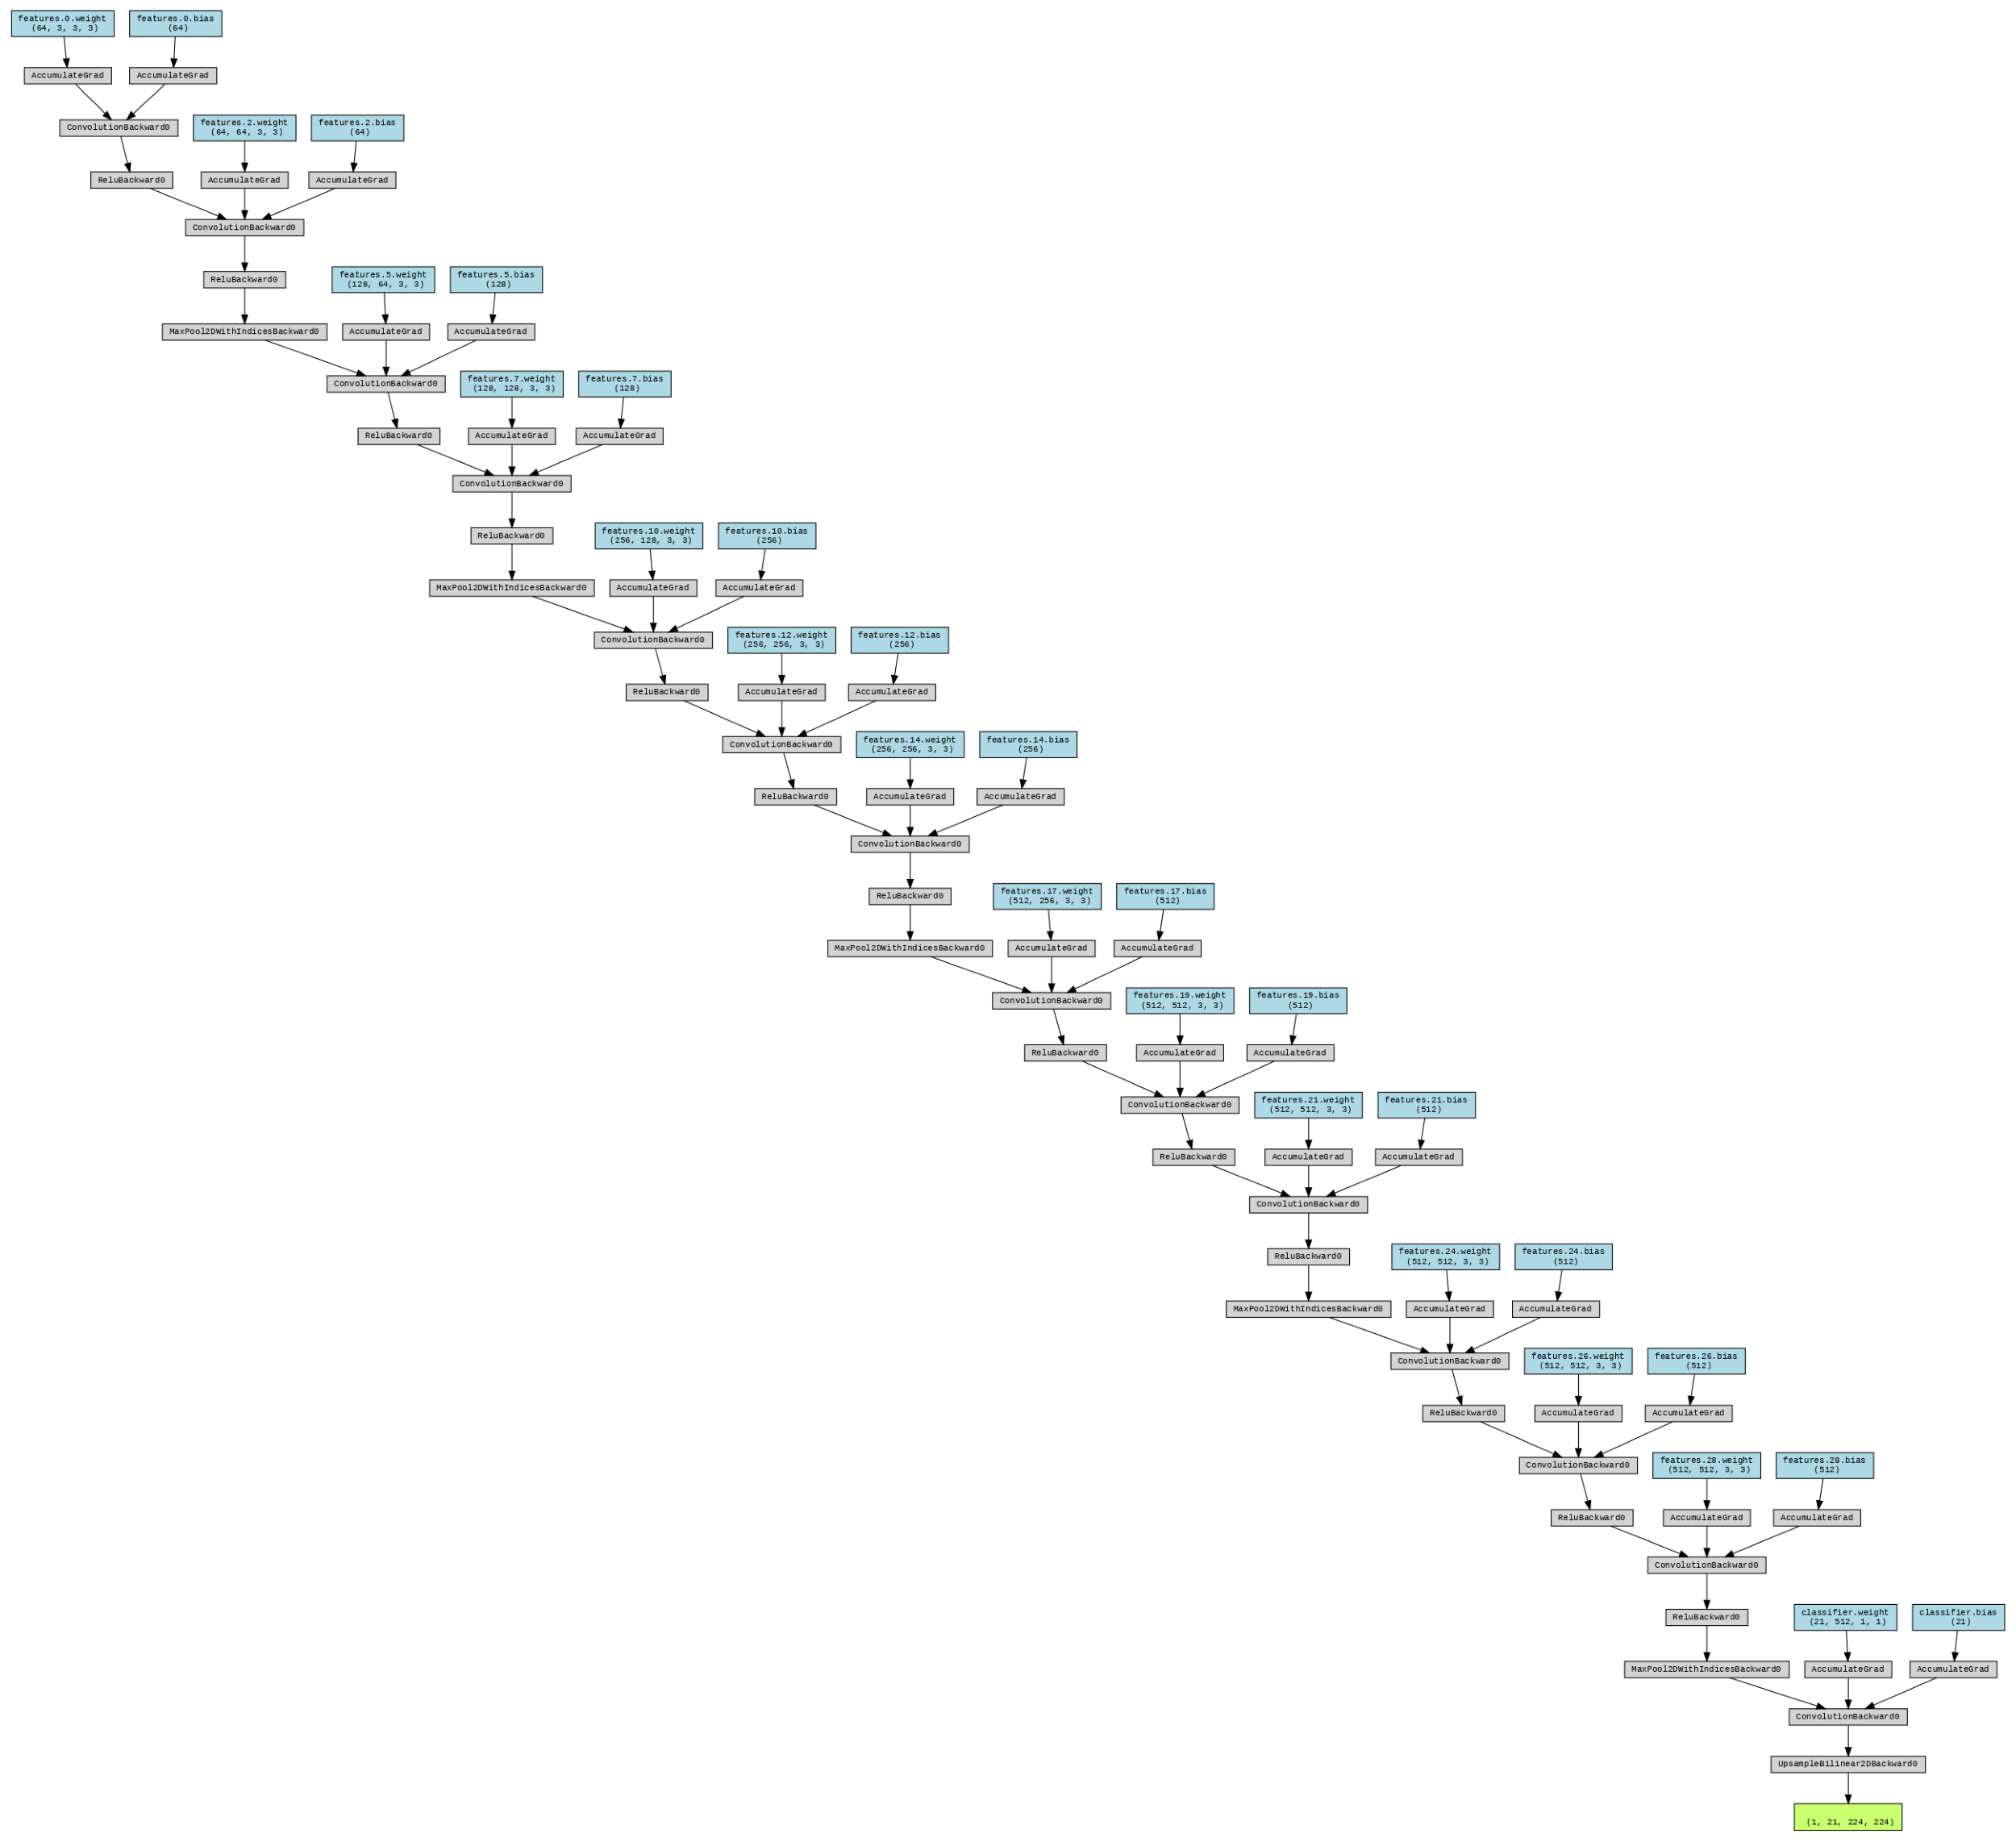

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# fcn_model.png 파일을 읽어들입니다.
img = mpimg.imread('fcn_model.png')

# 이미지를 표시합니다.
plt.figure(figsize=(32, 32))  # 이미지 크기 조정 (필요에 따라 조정)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

### Step 5. 데이터 전처리 및 DataLoader 생성

데이터를 PyTorch DataLoader로 불러올 수 있게 전처리를 설정합니다.

최소 전처리로 이미지를 텐서 형태로 변환하고, 마스크 역시 텐서로 변환합니다.

In [ ]:
print("Setting up transformations and data loader...")
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 모델 입력 크기로 조정
    transforms.ToTensor(),  # 이미지 데이터를 텐서로 변환
])

# Target transformation for mask (convert to tensor)
target_transform = transforms.Compose([
    transforms.Resize((224, 224), interpolation=transforms.InterpolationMode.NEAREST),
    transforms.PILToTensor(),  # 마스크 데이터를 텐서로 변환
])

train_dataset = VOCSegmentation(root='./', year='2012', image_set='train', download=False,
                                transform=transform, target_transform=target_transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
print("Data loader initialized.")


Setting up transformations and data loader...
Data loader initialized.


### Step 6. 손실 함수와 옵티마이저 설정

모델 학습을 위한 손실 함수와 옵티마이저를 설정합니다.


손실 함수는 CrossEntropyLoss로, VOC 데이터셋에서 배경을 나타내는 255를 무시합니다.

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index=255)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print("Loss function and optimizer set up.")

Loss function and optimizer set up.


### Step 7. 모델 학습

학습 루프를 실행하여 모델을 학습시킵니다. 10개 배치마다 현재 배치의 손실을 출력하고, 각 에폭(epoch)마다 평균 손실을 출력합니다.

In [ ]:
num_epochs = 1
print("Starting training...")

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, targets) in enumerate(train_loader, 1):
        # Move images and targets to the same device as the model
        images = images.cuda()  # Assuming your model is on CUDA
        targets = targets.cuda()

        outputs = model(images)
        loss = criterion(outputs, targets.squeeze(1).long())  # Squeeze target dimension for CrossEntropyLoss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 10 == 0:  # Print every 10 batches
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i}/{len(train_loader)}], Loss: {loss.item():.4f}")

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] complete. Average Loss: {epoch_loss:.4f}")

print("Training complete.")

Starting training...
Epoch [1/1], Batch [10/366], Loss: 1.9867
Epoch [1/1], Batch [20/366], Loss: 1.7822
Epoch [1/1], Batch [30/366], Loss: 1.6422
Epoch [1/1], Batch [40/366], Loss: 1.1513
Epoch [1/1], Batch [50/366], Loss: 0.8047
Epoch [1/1], Batch [60/366], Loss: 1.0417
Epoch [1/1], Batch [70/366], Loss: 1.5788
Epoch [1/1], Batch [80/366], Loss: 1.2515
Epoch [1/1], Batch [90/366], Loss: 1.0871
Epoch [1/1], Batch [100/366], Loss: 1.0042
Epoch [1/1], Batch [110/366], Loss: 1.6651
Epoch [1/1], Batch [120/366], Loss: 1.4921
Epoch [1/1], Batch [130/366], Loss: 1.2426
Epoch [1/1], Batch [140/366], Loss: 1.3891
Epoch [1/1], Batch [150/366], Loss: 2.2061
Epoch [1/1], Batch [160/366], Loss: 2.3288
Epoch [1/1], Batch [170/366], Loss: 1.5787
Epoch [1/1], Batch [180/366], Loss: 0.6846
Epoch [1/1], Batch [190/366], Loss: 1.7411
Epoch [1/1], Batch [200/366], Loss: 1.2047
Epoch [1/1], Batch [210/366], Loss: 1.2625
Epoch [1/1], Batch [220/366], Loss: 2.1104
Epoch [1/1], Batch [230/366], Loss: 0.9771

###  Step 8. 모델 평가

평가 루프를 실행하여 학습 데이터에 대한 손실을 계산하여 출력합니다.

평가 단계에서는 모델을 평가 모드로 설정하여 파라미터 업데이트가 일어나지 않도록 합니다.

In [ ]:
def evaluate(model, dataloader, criterion):
    print("Starting evaluation...")
    model.eval()
    total_loss = 0

    # Get the device the model is on
    device = next(model.parameters()).device

    with torch.no_grad():
        for images, targets in dataloader:
            # Move images and targets to the same device as the model
            images = images.to(device)
            targets = targets.to(device)

            outputs = model(images)
            loss = criterion(outputs, targets.squeeze(1).long())
            total_loss += loss.item()
    average_loss = total_loss / len(dataloader)
    print(f"Evaluation complete. Average Loss: {average_loss:.4f}")
    return average_loss

# Evaluate model on the training data
average_loss = evaluate(model, train_loader, criterion)
print(f"Final Average Loss on Training Data: {average_loss:.4f}")

Starting evaluation...
Evaluation complete. Average Loss: 1.2122
Final Average Loss on Training Data: 1.2122


###  Step 9. 학습된 모델을 사용해 이미지의 세그멘테이션 결과를 시각화

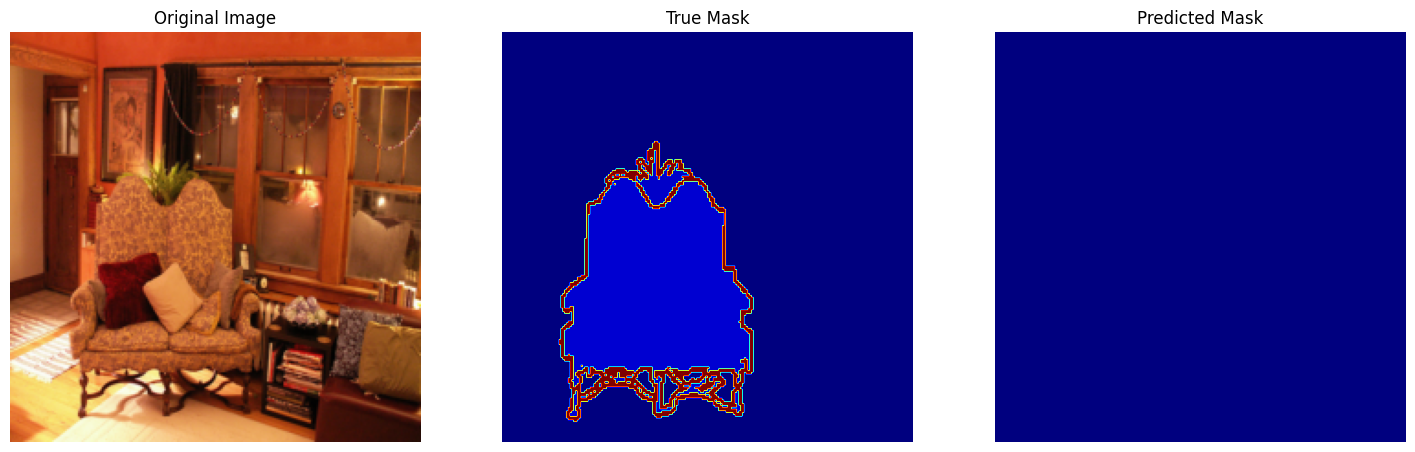

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Function to visualize a single image and its segmentation mask
def visualize_segmentation(model, dataloader):
    model.eval()  # Set the model to evaluation mode

    # Get the device the model is on
    device = next(model.parameters()).device  # Get device of model parameters

    with torch.no_grad():
        # Load a single batch of images and targets
        for images, targets in dataloader:
            # Move images and targets to the same device as the model
            images = images.to(device)  # Move images to the correct device
            targets = targets.to(device)  # Move targets to the correct device

            outputs = model(images)
            break  # Only process the first batch for visualization

        # Get the first image and corresponding segmentation
        image = images[0].permute(1, 2, 0).cpu().numpy()  # Convert to (H, W, C) format for plotting
        true_mask = targets[0].squeeze(0).cpu().numpy()  # True segmentation mask
        pred_mask = torch.argmax(outputs[0], dim=0).cpu().numpy()  # Predicted segmentation mask

        # Plot the original image, true mask, and predicted mask
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))
        axs[0].imshow(image)
        axs[0].set_title("Original Image")
        axs[1].imshow(true_mask, cmap="jet")
        axs[1].set_title("True Mask")
        axs[2].imshow(pred_mask, cmap="jet")
        axs[2].set_title("Predicted Mask")

        for ax in axs:
            ax.axis("off")
        plt.show()

# Visualize the segmentation results on a batch of images
visualize_segmentation(model, train_loader)

위의 시각화 결과에서 모델이 예측한 마스크(Predicted Mask)가 실제 마스크(True Mask)와 차이가 큽니다.

이는 다음과 같은 이유가 있을 수 있습니다.

1. 모델 학습 단계: 단 1 epoch만 학습을 수행했기 때문에 학습이 충분히 이루어지지 않아 모델의 예측 성능이 낮습니다. 여러 epoch 동안 충분히 학습시키면 예측 정확도가 향상될 것입니다.

2. 네트워크 구조: FCN-32 구조는 해상도가 낮아 픽셀 단위 예측의 세밀함이 떨어질 수 있습니다. FCN-16이나 FCN-8과 같은 구조로 업샘플링을 더 세밀하게 진행하면 정확도가 높아질 수 있습니다.


##### FCN에서 얻을 수 있는 인사이트

FCN을 사용한 세그멘테이션 모델의 성능은 일반적으로 다음과 같은 요소에 영향을 받습니다.

1. 업샘플링 방식
    - FCN-32, FCN-16, FCN-8 구조의 차이는 업샘플링 과정에서 얼마나 많은 정보를 포함하느냐에 따라 정확도가 다릅니다. 예를 들어, FCN-8은 FCN-32보다 더 많은 레이어에서 얻은 정보를 결합하여 세밀한 세그멘테이션이 가능해집니다.

2. 백본(backbone)
    - VGG-16, ResNet 등 다양한 백본 모델에 따라 성능과 속도가 달라질 수 있습니다. 일반적으로 ResNet과 같은 더 깊은 네트워크를 사용하면 성능이 향상될 수 있지만, 계산 비용이 더 큽니다.

##### FCN-32, FCN-16, FCN-8 차이점

- FCN-32
    - 마지막 출력 레이어를 한 번의 32배 업샘플링으로 원본 이미지 크기로 복원합니다. 이 방식은 연산이 빠르지만, 해상도가 낮아지기 때문에 작은 객체의 세밀한 경계를 잘 구분하지 못할 수 있습니다.

- FCN-16
    - 16배 업샘플링을 사용하며, 중간 피처 맵 정보를 결합해 FCN-32보다 더 세밀한 세그멘테이션이 가능합니다. 따라서 상대적으로 높은 정확도를 얻을 수 있습니다.

- FCN-8
    - 가장 세밀한 구조로, 8배 업샘플링을 통해 FCN-32, FCN-16에 비해 작은 객체도 잘 인식할 수 있도록 합니다. FCN-8은 여러 피처 맵 정보를 결합하여, 경계가 복잡한 영역의 분할 성능이 높습니다.

##### FCN-16과 FCN-8 구현 방법

FCN-16과 FCN-8은 업샘플링 과정에서 더 많은 피처 맵 정보를 결합하여 더 높은 해상도의 예측을 제공합니다. 다음은 FCN-16과 FCN-8의 구현 방법입니다.

1. FCN-16

    - FCN-32와 마찬가지로 마지막 피처 맵에서 예측을 수행하지만, 32배 업샘플링을 하는 대신, 중간 레이어에서 16배 업샘플링을 수행하여 원본 이미지에 가까운 해상도로 복원합니다.
    - 이를 위해 VGG의 pool4 레이어의 피처 맵을 추가로 결합하여 더 세밀한 정보를 포함합니다.

    ```
    class FCN16(nn.Module):
        def __init__(self, num_classes=21):
            super(FCN16, self).__init__()
            vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
            self.features = vgg.features
            self.pool4_conv = nn.Conv2d(512, num_classes, kernel_size=1)  # pool4 레이어의 출력 크기를 맞춤
            self.classifier = nn.Conv2d(512, num_classes, kernel_size=1)
            self.upsample32x = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.upsample16x = nn.Upsample(scale_factor=16, mode='bilinear', align_corners=True)

        def forward(self, x):
            x = self.features[:24](x)  # pool4 전까지 진행
            pool4_out = self.pool4_conv(x)
            x = self.features[24:](x)  # pool5를 포함한 나머지 컨볼루션 레이어 진행
            x = self.classifier(x)
            x = self.upsample32x(x)  # 32배 업샘플링
            x = x + pool4_out  # pool4와 합성
            x = self.upsample16x(x)  # 16배 업샘플링으로 원본 크기 복원
            return x
    ```

2. FCN-8

    - FCN-16의 방식에 추가적으로 pool3 레이어의 피처 맵도 결합하여 더 세밀하게 업샘플링합니다.
    - 최종적으로 8배 업샘플링을 통해 원본 이미지 크기로 복원하여, 가장 높은 해상도의 세그멘테이션 결과를 제공합니다.
    ```
    class FCN8(nn.Module):
        def __init__(self, num_classes=21):
            super(FCN8, self).__init__()
            vgg = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)
            self.features = vgg.features
            self.pool3_conv = nn.Conv2d(256, num_classes, kernel_size=1)  # pool3 출력 맞춤
            self.pool4_conv = nn.Conv2d(512, num_classes, kernel_size=1)
            self.classifier = nn.Conv2d(512, num_classes, kernel_size=1)
            self.upsample32x = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.upsample16x = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
            self.upsample8x = nn.Upsample(scale_factor=8, mode='bilinear', align_corners=True)

        def forward(self, x):
            x = self.features[:17](x)  # pool3 전까지 진행
            pool3_out = self.pool3_conv(x)
            x = self.features[17:24](x)  # pool4 전까지 진행
            pool4_out = self.pool4_conv(x)
            x = self.features[24:](x)  # pool5 이후 컨볼루션 진행
            x = self.classifier(x)
            x = self.upsample32x(x)  # 32배 업샘플링
            x = x + pool4_out  # pool4와 합성
            x = self.upsample16x(x)  # 16배 업샘플링
            x = x + pool3_out  # pool3과 합성
            x = self.upsample8x(x)  # 8배 업샘플링으로 원본 크기 복원
            return x

    ```

##### FCN 논문에서의 학습 설정

FCN 논문에서는 21 클래스로 구성된 PASCAL VOC 2011 데이터셋을 대상으로 학습을 수행하였으며, FCN-32, FCN-16, FCN-8 각각에 대해 성능을 비교했습니다. 논문에서는 다양한 에폭 동안 학습을 진행했으며, 학습률 조정, 가중치 초기화, 그리고 다중 스케일과 훈련 이미지 크기 변화를 활용하여 모델의 일반화 성능을 높였다고 합니다.

논문 결과에 따르면, FCN-32는 속도는 빠르지만 작은 객체에 대한 예측이 불완전한 반면, FCN-16과 FCN-8은 점점 더 세밀한 객체 경계 예측이 가능하며, 특히 FCN-8이 가장 높은 정확도를 기록했다고 합니다.


##### 요약

- FCN-32
    - 마지막 출력 피처 맵을 32배 업샘플링하여 원본 크기로 복원하는 방식입니다.
- FCN-16
    - 16배 업샘플링을 위해 pool4 피처 맵과 결합하여 더 높은 정밀도를 제공합니다.
- FCN-8
    - 가장 세밀한 예측을 위해 pool3과 pool4를 모두 결합하여 8배 업샘플링을 수행합니다.

이러한 차이점 덕분에, FCN-8이 높은 정확도를 제공하며, 특히 복잡한 객체 경계에서도 좋은 성능을 보입니다.

FCN을 사용할 때는 애플리케이션의 필요에 따라 속도와 정확도 사이에서 선택할 수 있습니다.

##### 탐구 / 실습

1. FCN-32, FCN-16, FCN-8의 차이점은 무엇일까요?

2. FCN 모델의 세그멘테이션 결과가 FCN-32, FCN-16, FCN-8 별로 차이가 발생하는 이유로는 무엇일까요?

3. FCN이 해결하고자 한 문제는 무엇이며, 이를 통해 얻을 수 있는 인사이트는 무엇인가요?

4. 왜 VGG를 백본으로 선택했을까요?

5. FCN-8을 더 개선하기 위한 방법이 있을까요?

탐구 / 실습 예시 답안

<details>
<summary>1. FCN-32, FCN-16, FCN-8의 차이점은 무엇일까요?</summary>

**답변**:
- **구조적 차이**: FCN-32, FCN-16, FCN-8의 차이는 업샘플링 단계에서 결합하는 피처 맵의 수와 위치에 있습니다.
  - **FCN-32**: 가장 단순한 구조로, 마지막 피처 맵에서 32배 업샘플링하여 원본 크기로 복원합니다.
  - **FCN-16**: `pool4` 피처 맵과 결합하여 16배 업샘플링을 수행해 원본 크기로 복원합니다.
  - **FCN-8**: `pool3`과 `pool4` 피처 맵을 모두 결합하여 8배 업샘플링으로 복원합니다.
  
- **연산 비용과 파라미터 수**: VGG 백본을 공유하므로 세 모델 간 파라미터 수의 차이는 크지 않습니다. 하지만 **FCN-8**은 추가 피처 맵 결합으로 연산 비용이 다소 증가해 가장 느리고, **FCN-32**는 연산이 단순해 가장 빠릅니다.

- **의견**: FCN-8은 복잡한 경계와 작은 객체를 더 잘 인식할 수 있으며, 고해상도 세그멘테이션이 필요한 응용에 적합합니다. 반면, FCN-32는 비교적 빠른 연산을 요구하는 상황에서 큰 영역의 대략적인 세그멘테이션을 수행하기에 적합합니다.

</details>

<details>
<summary>2. FCN 모델의 세그멘테이션 결과가 FCN-32, FCN-16, FCN-8 별로 차이가 발생하는 이유로는 무엇일까요?</summary>

**답변**:
- **경계 세밀도**: FCN-8은 피처 맵 결합을 통해 세밀한 정보가 포함되므로 복잡한 경계를 더 정확하게 추정할 수 있습니다. 반면, FCN-32는 단일 피처 맵을 32배 업샘플링하기 때문에 세밀한 경계 정보가 부족하여 대략적인 형태만 추정합니다.

- **모델의 적합성**:
  - **FCN-32**: 넓은 영역을 가진 객체나 빠른 연산이 중요한 응용에 적합합니다.
  - **FCN-16**: 중간 크기의 객체나 조금 더 세밀한 경계를 인식해야 할 때 사용됩니다.
  - **FCN-8**: 작은 객체나 복잡한 경계가 포함된 객체를 구분하는 데 적합합니다. 특히 자율주행 차량의 객체 감지처럼 높은 해상도가 요구되는 경우 유리합니다.

</details>

<details>
<summary>3. FCN이 해결하고자 한 문제는 무엇이며, 이를 통해 얻을 수 있는 인사이트는 무엇인가요?</summary>

**답변**:
- **문제 정의**: FCN은 기존의 이미지 분류 네트워크가 객체의 픽셀 단위 정보를 활용하지 못한다는 문제를 해결하기 위해 개발되었습니다. 일반적인 CNN은 이미지 전체의 클래스만 예측할 수 있어, 각 픽셀에 대해 어떤 객체에 속하는지 알기 어렵습니다.

- **해결 방법**: FCN은 CNN의 마지막 Fully Connected 레이어를 제거하고 모든 레이어를 컨볼루션 레이어로 바꿔서 픽셀 단위 예측을 가능하게 합니다. 업샘플링을 통해 피처 맵을 원본 크기로 복원하여 세그멘테이션을 수행합니다.

- **인사이트**: FCN은 자율 주행, 의료 영상, 위성 이미지 분석 등 픽셀 단위의 세밀한 객체 구분이 필요한 분야에서 강력한 도구가 됩니다. 이는 또한 후속 연구에서 픽셀 단위 세그멘테이션의 중요한 기초가 되었으며, 이후 U-Net, DeepLab 등 다양한 모델의 토대가 되었습니다.

</details>

<details>
<summary>4. 왜 VGG를 백본으로 선택했을까요?</summary>

**답변**:
- **VGG-16의 장점**: VGG-16은 구조가 단순하면서도 깊이 있는 특성 추출이 가능한 모델로, 층이 순차적으로 쌓여 있어 피처 맵 결합과 업샘플링을 적용하기 쉽습니다.
  
- **ResNet과 비교**: ResNet은 스킵 연결을 통해 깊이 있는 학습이 가능하지만, 스킵 연결 구조가 피처 맵 결합을 복잡하게 만들 수 있습니다. FCN은 간단한 구조로 순차적으로 레이어를 연결하는 VGG-16이 적합한 선택이었습니다.

- **적합성 논의**: FCN의 경우 VGG-16이 적합했지만, ResNet이나 EfficientNet 같은 더 깊은 네트워크를 백본으로 사용하면 성능이 더 향상될 가능성이 있습니다. 다만 연산 비용이 증가할 수 있으므로, 응용 상황에 맞는 백본을 선택하는 것이 중요합니다.

</details>

<details>
<summary>5. FCN-8을 더 개선하기 위한 방법이 있을까요?</summary>

**답변**:
- **다중 스케일 피처 결합**: FCN-8은 여러 피처 맵을 결합해 세밀한 정보를 활용하지만, 추가적인 다중 스케일 피처 결합을 도입해 작은 객체와 큰 객체를 동시에 잘 인식할 수 있도록 개선할 수 있습니다.

- **Conditional Random Field (CRF)**: 업샘플링 후 CRF를 추가해 세그멘테이션 경계를 더욱 날카롭게 할 수 있습니다. CRF는 객체의 경계가 더욱 명확하게 표현되도록 돕는 후처리 기법으로 자주 사용됩니다.

- **디코더 구조 추가**: U-Net이나 DeepLab처럼 디코더 모듈을 추가하면, 업샘플링 과정에서 손실된 정보를 더 효과적으로 복원하여 FCN-8의 성능을 개선할 수 있습니다.

이러한 개선 방안들은 FCN의 세그멘테이션 성능을 더욱 높이는 데 기여할 수 있습니다.

</details>


### 2.2 U-Net

<img src="https://images.velog.io/images/kimkj38/post/10a66515-e857-445e-af04-a31aa20c4cbd/image.png">

#### 2.2.1 U-Net의 등장 배경

U-Net은 2015년 의료 영상 분야에서 제안된 세그멘테이션 모델입니다. 특히 Biomedical Image Segmentation을 위해 개발되었으며, 세포 영역 검출에서 탁월한 성능을 보여주었습니다.

네트워크 구조가 U자 형태를 띠고 있어 U-Net이라는 이름이 붙었으며, **Fully Convolutional Network (FCN)**의 아이디어를 확장하여 더욱 정교한 세그멘테이션을 가능하게 했습니다.



#### 2.2.2 네트워크 구조

- 전체 구조의 특징

    1. 대칭적 구조
        - Contracting Path (좌측)
        - Expansive Path (우측)
        - 두 경로가 U자 형태로 대칭을 이룸

    2. Skip Connection

        - 동일한 레벨의 특징맵 연결
        - 세부 정보 보존 강화

- Contracting Path (수축 경로)

    - 기본 블록 구성
        - 3x3 Convolution (2회) + ReLU
        - 2x2 Max Pooling (stride 2)
    - 채널 수 변화
        - 각 다운샘플링 후 채널 수 2배 증가
        - 시작: 64채널
        - 최종: 1024채널
    - 특징맵 크기 변화
        - 입력 이미지 크기 감소 (Pooling에 따라 절반씩 감소)

- Expansive Path (확장 경로)

    - Up-Convolution 사용
        - ConvTranspose2D로 특징맵 크기 확대
    - 채널 수 변화
        - 각 업샘플링 후 채널 수 절반 감소
    - 특징맵 연결
        - Skip Connection으로 Contracting Path의 특징맵과 Concatenate

#### 2.2.3 학습 과정에서의 특이점

- 타일(Tile) 전략

    1. 목적
        - 대형 이미지 처리
            - 의료 영상과 같은 고해상도 이미지에서는 많은 연산량이 필요하기 때문에 효율적으로 처리하기 위해 타일(Tile) 전략을 사용합니다.
        - 고해상도 세그멘테이션 가능
            - U-Net 모델은 작은 세부 영역의 정보도 보존해야 하므로, 전체 이미지를 여러 겹치는 타일로 나누어 예측을 수행합니다.

    2. 구현 방식
        - 이미지를 겹치는 타일로 분할
            - 전체 이미지를 여러 겹치는 타일로 나누어 각 타일을 개별적으로 처리합니다. 각 타일이 필요한 정보를 담을 수 있도록 주변부까지 포함하여 겹치게(Overlap) 분할합니다.
        - 각 타일 독립적 처리
            - 분할된 각 타일을 독립적으로 모델에 입력하여 예측을 수행합니다.
        - 결과 조합으로 전체 세그멘테이션 완성
            - 타일별 예측을 병합하여 전체 이미지에 대한 세그멘테이션 결과를 완성합니다. 이 과정에서 누락된 정보를 보충하기 위해 이미지 테두리를 미러링하여 복사(Overlapping)를 수행합니다.
    
    <img src='https://blog.kakaocdn.net/dn/doTU53/btrroGvynkJ/RYnJMrlkPzfYIA3Q1UiK1K/img.png'>

    <img src='https://blog.kakaocdn.net/dn/bT0aM4/btrroYbItMc/YkrRPx95RKaz3XGyKiiAT1/img.png'>

    - 예시 이미지에서 타일 경계는 원본 이미지와 대칭적으로 복사된 픽셀을 포함하여 누락 없이 세그멘테이션을 수행할 수 있습니다.

   - 예측 과정에서 연산 메모리를 줄이고, 이미지 전체에 대해 고해상도의 세그멘테이션 결과를 얻을 수 있는 장점이 있습니다.

    - 데이터 불균형 해결

    1. Weight Map 도입
        - 클래스 간 분포 불균형 해결
            - 의료 이미지의 경우 세포와 배경 영역의 비율이 매우 불균형하기 때문에, 경계와 같은 중요한 영역에 높은 가중치를 부여하는 `Weight Map`을 사용합니다.

        - 세포 경계 같은 중요 영역 강조
            - 세포 경계와 같이 작은 픽셀 영역이 정확하게 구분되도록 중요 영역에 높은 가중치를 부여하여 모델이 특정 부분을 더 잘 학습하도록 유도합니다.

    2. 손실 함수 가중치 적용
        - 세포 분할 시 같은 클래스가 인접한 경우 정확한 인스턴스 분할이 어려운데, U-Net에서는 두 세포 간에 배경이 반드시 존재하도록 하는 방식으로 손실 함수를 재정의합니다.
        - `Weight Map`을 통해, 경계와 같은 중요한 픽셀에 높은 가중치를 부여하여 손실 계산 시 더욱 중요한 픽셀로 인식하도록 설정합니다.
        - 예를 들어, 아래와 같은 가중치를 적용합니다.

        ```python
        class_weights = {
            'cell_boundary': 10.0,  # 높은 가중치로 경계 강조
            'cell_body': 1.0,
            'background': 1.0
        }
        ```

    <img src='https://blog.kakaocdn.net/dn/so4zs/btrrqmbQcw0/hDeznRIQGxqIDDekvto25k/img.png'>

#### 2.2.4 구조적 특이점

- Valid Padding 사용

    1. 특징
        - Padding을 사용하지 않는 convolution 연산
        - Feature map의 크기가 연산마다 감소

    2. 결과
        - 입력(572x572)과 출력(388x388) 크기 차이 발생
        - 경계 부분의 정보 손실 최소화

- Deep Feature 활용

    - Feature map 연결 방식

        1. Skip Connection

            - 동일 레벨 특징맵 직접 연결
            - 공간 정보 보존

        2. Concatenation

            - 채널 방향으로 특징 결합
            - 정보의 손실 없이 통합

#### 2.2.5 장단점

- 장점

    1. 적은 학습 데이터로도 좋은 성능
    2. 세부 특징 보존 능력 우수
    3. 다양한 도메인에 적용 가능

- 단점

    1. 메모리 사용량이 많음
    2. 학습 시간이 비교적 긺
    3. 입출력 크기 불일치

## U-Net을 활용한 ISBI 2012 EM Segmentation Challenge 데이터셋 전처리 및 모델 구축 및 학습 그리고 시각화


### Step1. 데이터셋 준비 및 전처리

- ISBI 2012 EM Segmentation Challenge에 사용된 membrane 데이터셋으로 진행해보도록 하겠습니다.

    <img src='https://imagej.net/media/events/challenge-isbi-2012-sample-image.png'>

- 왼쪽의 세포 이미지는 512x512(grayscale)이며, 오른쪽은 세포와 세포 사이의 벽(배경)을 분할한 모습입니다.

- 실제 레이블된 값은 세포는 255, 배경은 1로 지정되어 있습니다.


### 1.1 데이터셋 준비

- ISBI 2012 EM Segmentation Challenge에 사용된 membrane 데이터셋을 다운로드합니다.

In [ ]:
!wget https://downloads.imagej.net/ISBI-2012-challenge.zip
!unzip ISBI-2012-challenge.zip

--2024-10-30 14:32:12--  https://downloads.imagej.net/ISBI-2012-challenge.zip
Resolving downloads.imagej.net (downloads.imagej.net)... 144.92.48.183
Connecting to downloads.imagej.net (downloads.imagej.net)|144.92.48.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31487579 (30M) [application/zip]
Saving to: ‘ISBI-2012-challenge.zip’

ISBI-2012-challenge 100%[===================>]  30.03M  15.2MB/s    in 2.0s    

2024-10-30 14:32:15 (15.2 MB/s) - ‘ISBI-2012-challenge.zip’ saved [31487579/31487579]



압축을 해제하면 다음과 같은 파일들이 생성됩니다.
```
annotations/                  images.tar.gz            test-volume.tif*   unet_model.png
annotations.tar.gz            ISBI-2012-challenge.zip  train-labels.tif*
challenge-error-metrics.bsh*  sample_data/             train-volume.tif*
images/                       test-labels.tif*         unet_model
```

하지만, 우리에게 필요한 파일은 train-volume.tif, train-labels.tif, test-volume.tif입니다.

#### 데이터셋 디렉토리 구조 설정

In [ ]:
!mkdir dataset
!cp train-volume.tif train-labels.tif test-volume.tif dataset/

### 1.2 전처리 과정

각 .tif 파일에는 512x512 크기의 이미지 여러 장이 포함되어 있습니다. 이를 개별 .npy 파일로 변환하여 train, val, test 폴더에 저장합니다. 전체 데이터를 섞은 후 훈련(train), 검증(val), 테스트(test) 세트로 나눕니다.

총 이미지 수: 30


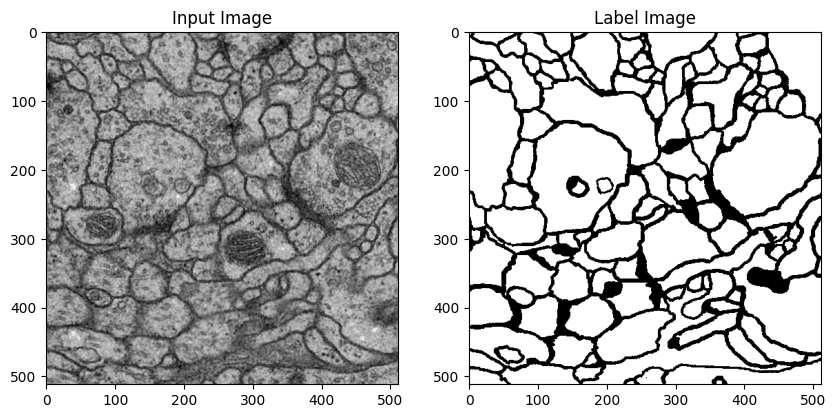

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 데이터 디렉토리 설정
data_dir = './dataset'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# 파일 경로 설정
train_volume_path = os.path.join(data_dir, 'train-volume.tif')
train_labels_path = os.path.join(data_dir, 'train-labels.tif')

# 이미지 불러오기
train_volume = Image.open(train_volume_path)
train_labels = Image.open(train_labels_path)

# 이미지 정보 확인
n_frames = train_volume.n_frames  # 총 이미지 수
print(f'총 이미지 수: {n_frames}')

# 데이터셋 분할 비율 설정 (80% 훈련, 10% 검증, 10% 테스트)
n_train = int(n_frames * 0.8)
n_val = int(n_frames * 0.1)
n_test = n_frames - n_train - n_val

# 프레임 인덱스 섞기
indices = np.arange(n_frames)
np.random.shuffle(indices)

# 디렉토리 생성
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

create_dir(train_dir)
create_dir(val_dir)
create_dir(test_dir)

# 데이터셋 저장 함수
def save_frames(indices, start, end, input_img, label_img, save_dir):
    for i, idx in enumerate(indices[start:end]):
        input_img.seek(idx)
        label_img.seek(idx)

        input_array = np.array(input_img)
        label_array = np.array(label_img)

        np.save(os.path.join(save_dir, f'input_{i:03d}.npy'), input_array)
        np.save(os.path.join(save_dir, f'label_{i:03d}.npy'), label_array)

# 데이터셋 저장
save_frames(indices, 0, n_train, train_volume, train_labels, train_dir)
save_frames(indices, n_train, n_train + n_val, train_volume, train_labels, val_dir)
save_frames(indices, n_train + n_val, n_frames, train_volume, train_labels, test_dir)

# 샘플 이미지 시각화
input_sample = np.load(os.path.join(train_dir, 'input_000.npy'))
label_sample = np.load(os.path.join(train_dir, 'label_000.npy'))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(input_sample, cmap='gray')
plt.title('Input Image')

plt.subplot(1,2,2)
plt.imshow(label_sample, cmap='gray')
plt.title('Label Image')

plt.show()

### Step 2. U-Net 모델 구축

U-Net은 Biomedical Image Segmentation에 널리 사용되는 모델입니다.

아래는 U-Net의 구조를 구현한 코드입니다.

<img src='https://miro.medium.com/max/1400/1*qNdglJ1ORP3Gq77MmBLhHQ.png'>

위의 U-Net 구조를 살펴보면 파란색 화살가 반복되는 것을 알 수 있습니다.

Conv 3x3 + Batch Normalizatin + Relu 를 CBR2d라는 함수로 정의하고 이를 forward 에서 반복해서 사용하도록 하겠습니다.

In [ ]:
import torch
import torch.nn as nn

class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        def CBR(in_channels, out_channels):
            layers = [
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True)
            ]
            return nn.Sequential(*layers)

        # Contracting path
        self.enc1 = nn.Sequential(CBR(1, 64), CBR(64, 64))
        self.pool1 = nn.MaxPool2d(2)

        self.enc2 = nn.Sequential(CBR(64, 128), CBR(128, 128))
        self.pool2 = nn.MaxPool2d(2)

        self.enc3 = nn.Sequential(CBR(128, 256), CBR(256, 256))
        self.pool3 = nn.MaxPool2d(2)

        self.enc4 = nn.Sequential(CBR(256, 512), CBR(512, 512))
        self.pool4 = nn.MaxPool2d(2)

        self.center = CBR(512, 1024)

        # Expansive path
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = nn.Sequential(CBR(1024, 512), CBR(512, 512))

        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = nn.Sequential(CBR(512, 256), CBR(256, 256))

        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = nn.Sequential(CBR(256, 128), CBR(128, 128))

        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = nn.Sequential(CBR(128, 64), CBR(64, 64))

        self.final = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        pool1 = self.pool1(enc1)

        enc2 = self.enc2(pool1)
        pool2 = self.pool2(enc2)

        enc3 = self.enc3(pool2)
        pool3 = self.pool3(enc3)

        enc4 = self.enc4(pool3)
        pool4 = self.pool4(enc4)

        # Center
        center = self.center(pool4)

        # Decoder
        up4 = self.up4(center)
        merge4 = torch.cat([up4, enc4], dim=1)
        dec4 = self.dec4(merge4)

        up3 = self.up3(dec4)
        merge3 = torch.cat([up3, enc3], dim=1)
        dec3 = self.dec3(merge3)

        up2 = self.up2(dec3)
        merge2 = torch.cat([up2, enc2], dim=1)
        dec2 = self.dec2(merge2)

        up1 = self.up1(dec2)
        merge1 = torch.cat([up1, enc1], dim=1)
        dec1 = self.dec1(merge1)

        out = self.final(dec1)
        return out

### Step 3. 데이터셋 클래스 및 Transform 정의

PyTorch의 Dataset과 DataLoader를 사용하여 데이터를 불러옵니다.

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

class EM_Dataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.input_paths = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('input')])
        self.label_paths = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.startswith('label')])

    def __len__(self):
        return len(self.input_paths)

    def __getitem__(self, idx):
        input_image = np.load(self.input_paths[idx]) / 255.0
        label_image = np.load(self.label_paths[idx]) / 255.0

        # 채널 차원 추가 (C, H, W)
        input_image = np.expand_dims(input_image, axis=0).astype(np.float32)
        label_image = np.expand_dims(label_image, axis=0).astype(np.float32)

        # Tensor로 변환
        input_image = torch.from_numpy(input_image)
        label_image = torch.from_numpy(label_image)

        # Transform 적용 (필요한 경우)
        if self.transform:
            input_image = self.transform(input_image)

        return {'input': input_image, 'label': label_image}

#### 3.1 Transform 정의

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Normalize(mean=[0.5], std=[0.5])
])

### Step 4. 모델 학습 및 검증

In [ ]:
import torch.optim as optim
from tqdm import tqdm

# 하이퍼파라미터 설정
learning_rate = 1e-3
batch_size = 4
num_epochs = 20

# 데이터 로더 생성
train_dataset = EM_Dataset(train_dir, transform=transform)
val_dataset = EM_Dataset(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# 모델, 손실 함수, 옵티마이저 정의
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습 루프
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        inputs = batch['input'].to(device)
        labels = batch['label'].to(device)

        # 입력 차원 확인 (디버깅용)
        # print(f"Input shape: {inputs.shape}")  # [batch_size, 1, 512, 512]

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # 검증
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs = batch['input'].to(device)
            labels = batch['label'].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    avg_val_loss = val_loss / len(val_loader)
    print(f"Validation Loss: {avg_val_loss:.4f}")

Epoch 1/20: 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

Epoch [1/20], Loss: 0.5255


Validation Loss: 0.6003


Epoch 2/20: 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

Epoch [2/20], Loss: 0.3746


Validation Loss: 0.5669


Epoch 3/20: 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

Epoch [3/20], Loss: 0.3292


Validation Loss: 0.5215


Epoch 4/20: 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]

Epoch [4/20], Loss: 0.2957


Validation Loss: 0.4974


Epoch 5/20: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

Epoch [5/20], Loss: 0.2755


Validation Loss: 0.4504


Epoch 6/20: 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]

Epoch [6/20], Loss: 0.2579


Validation Loss: 0.2980


Epoch 7/20: 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

Epoch [7/20], Loss: 0.2508


Validation Loss: 0.2919


Epoch 8/20: 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

Epoch [8/20], Loss: 0.2389


Validation Loss: 0.3125


Epoch 9/20: 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

Epoch [9/20], Loss: 0.2286


Validation Loss: 0.2720


Epoch 10/20: 100%|██████████| 6/6 [00:06<00:00,  1.01s/it]

Epoch [10/20], Loss: 0.2208


Validation Loss: 0.2804


Epoch 11/20: 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

Epoch [11/20], Loss: 0.2147


Validation Loss: 0.2334


Epoch 12/20: 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

Epoch [12/20], Loss: 0.2119


Validation Loss: 0.2729


Epoch 13/20: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

Epoch [13/20], Loss: 0.2039


Validation Loss: 0.2231


Epoch 14/20: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

Epoch [14/20], Loss: 0.1977


Validation Loss: 0.2643


Epoch 15/20: 100%|██████████| 6/6 [00:05<00:00,  1.01it/s]

Epoch [15/20], Loss: 0.1925


Validation Loss: 0.2675


Epoch 16/20: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

Epoch [16/20], Loss: 0.1881


Validation Loss: 0.2827


Epoch 17/20: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

Epoch [17/20], Loss: 0.1871


Validation Loss: 0.2476


Epoch 18/20: 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

Epoch [18/20], Loss: 0.1810


Validation Loss: 0.2440


Epoch 19/20: 100%|██████████| 6/6 [00:05<00:00,  1.00it/s]

Epoch [19/20], Loss: 0.1819


Validation Loss: 0.2440


Epoch 20/20: 100%|██████████| 6/6 [00:05<00:00,  1.02it/s]

Epoch [20/20], Loss: 0.1824


Validation Loss: 0.2296


### Step 5. 테스트 및 결과 저장

In [ ]:
# 테스트 데이터셋 로더 생성
test_dataset = EM_Dataset(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# 결과 저장 디렉토리 생성
result_dir = './results'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

# 모델 저장 (필요한 경우)
# torch.save(model.state_dict(), 'unet_model.pth')

# 모델 로드 (필요한 경우)
# model.load_state_dict(torch.load('unet_model.pth'))

model.eval()
with torch.no_grad():
    for idx, batch in enumerate(test_loader):
        inputs = batch['input'].to(device)
        outputs = model(inputs)
        outputs = torch.sigmoid(outputs)
        output_image = outputs.cpu().numpy().squeeze()

        # 결과 저장
        plt.imsave(os.path.join(result_dir, f'output_{idx:03d}.png'), output_image, cmap='gray')

### Step 6. 결과 시각화

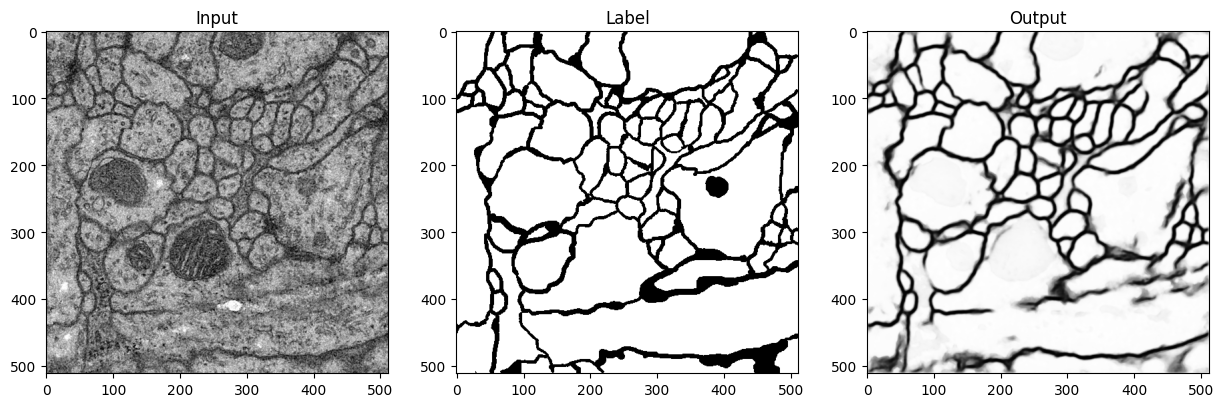

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

# 테스트 데이터셋에서 첫 번째 이미지 로드
input_image = np.load(test_dataset.input_paths[0])
label_image = np.load(test_dataset.label_paths[0])
output_image = plt.imread(os.path.join(result_dir, 'output_000.png'))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(input_image, cmap='gray')
plt.title('Input')

plt.subplot(1,3,2)
plt.imshow(label_image, cmap='gray')
plt.title('Label')

plt.subplot(1,3,3)
plt.imshow(output_image, cmap='gray')
plt.title('Output')

plt.show()

여러분들이 보시기에 위의 결과가 어떠신가요?

뭔가 아쉽다고 판단이 되신다면, 위의 하이퍼 파라미터를 수정해보시면서 성능을 개선시켜보시고, 노션 페이지에 공유해주세요.

## U-Net을 활용한 Oxford-IIIT Pets 데이터셋 세그멘테이션 모델 구축 및 개선

### Step 1: 필요한 라이브러리 import

In [ ]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import requests
import tarfile
import matplotlib.pyplot as plt
import numpy as np

### Step 2: U-Net 모델 정의 (위의 방식을 약간 변형)

In [ ]:
class UNet(nn.Module):
    def __init__(self, num_classes=3):
        super(UNet, self).__init__()

        # Encoder (Contracting Path)
        self.enc1 = self.double_conv(3, 64)
        self.pool1 = nn.MaxPool2d(2)
        self.enc2 = self.double_conv(64, 128)
        self.pool2 = nn.MaxPool2d(2)
        self.enc3 = self.double_conv(128, 256)
        self.pool3 = nn.MaxPool2d(2)
        self.enc4 = self.double_conv(256, 512)
        self.pool4 = nn.MaxPool2d(2)
        self.enc5 = self.double_conv(512, 1024)

        # Decoder (Expansive Path)
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = self.double_conv(1024, 512)
        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = self.double_conv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = self.double_conv(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = self.double_conv(128, 64)

        # 최종 출력층
        self.final_conv = nn.Conv2d(64, num_classes, kernel_size=1)

    def forward(self, x):
        # Encoder
        enc1 = self.enc1(x)
        enc2 = self.enc2(self.pool1(enc1))
        enc3 = self.enc3(self.pool2(enc2))
        enc4 = self.enc4(self.pool3(enc3))
        enc5 = self.enc5(self.pool4(enc4))

        # Decoder
        dec4 = self.dec4(torch.cat([self.up4(enc5), enc4], dim=1))
        dec3 = self.dec3(torch.cat([self.up3(dec4), enc3], dim=1))
        dec2 = self.dec2(torch.cat([self.up2(dec3), enc2], dim=1))
        dec1 = self.dec1(torch.cat([self.up1(dec2), enc1], dim=1))

        out = self.final_conv(dec1)
        return out

    def double_conv(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

#### U-Net 코드 상세 해설

##### 1. 전체 구조 설명

- U-Net은 'U' 형태의 대칭적인 구조를 가진 신경망으로, Encoder와 Decoder 두 부분으로 구성됩니다.

##### 2. 주요 컴포넌트 설명

##### Encoder (Contracting Path)
```python
self.enc1 = self.double_conv(3, 64)
# ... enc2 ~ enc5
```
- 목적: 입력 이미지에서 특징 추출
- 과정:
  - double_conv로 특징 추출
  - MaxPool로 크기 축소 (224→112→56→28→14)
  - 채널 수 증가 (3→64→128→256→512→1024)

##### Decoder (Expanding Path)
```python
self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
self.dec4 = self.double_conv(1024, 512)
# ... up3/dec3 ~ up1/dec1
```
- 목적: 특징맵 복원 및 세그멘테이션 맵 생성
- 과정:
  - ConvTranspose2d로 크기 확장
  - Encoder 특징맵과 결합(concatenate)
  - double_conv로 특징 처리

##### Skip Connections
```python
dec4 = self.dec4(torch.cat([self.up4(enc5), enc4], dim=1))
```
- 목적: 세부 정보 보존
- 작동:
  - Encoder의 특징맵을 Decoder로 직접 전달
  - 채널 차원(dim=1)으로 결합

##### Double Convolution 블록
```python
def double_conv(self, in_channels, out_channels):
    return nn.Sequential(...)
```
- 구성: Conv2D → ReLU → Conv2D → ReLU
- 특징:
  - 3x3 커널 사용
  - padding=1로 크기 유지
  - 동일한 출력 채널 수 유지

##### 3. 데이터 흐름

1. 이미지 입력 (3채널)
2. Encoder에서 특징 추출 및 압축
3. Bottleneck 계층 (가장 깊은 층)
4. Decoder에서 점진적 복원
5. 각 픽셀별 클래스 확률 출력

##### 4. 주요 장점
- Skip Connection으로 정밀한 위치 정보 보존
- 다양한 스케일의 특징 추출 가능
- 적은 학습 데이터로도 효과적인 학습 가능

### Step 3: 데이터셋 클래스 정의

In [ ]:
class OxfordPetsDataset(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None, target_transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.target_transform = target_transform
        self.images = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.images[idx])
        mask_path = os.path.join(self.masks_dir, self.images[idx].replace('.jpg', '.png'))

        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path)

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            mask = self.target_transform(mask)

        return image, mask

### Step 4: 데이터 다운로드 및 전처리

#### Oxford-IIIT Pets 데이터셋

- Parkhi et al이 만든 [Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/) 데이터 세트는 영상, 해당 레이블과 픽셀 단위의 마스크로 구성

- 마스크는 기본적으로 각 픽셀의 레이블
- 각 픽셀은 다음 세 가지 범주 중 하나
  *   class 1 : 애완동물이 속한 픽셀
  *   class 2 : 애완동물과 인접한 픽셀
  *   class 3 : 위에 속하지 않는 경우/주변 픽셀

- Images: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
- Annotations: https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

<img src='https://www.robots.ox.ac.uk/~vgg/data/pets/pet_annotations.jpg'>

In [ ]:
def download_and_extract(url, filename):
    if not os.path.exists(filename):
        response = requests.get(url, stream=True)
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        with tarfile.open(filename) as tar:
            tar.extractall()

# 데이터 다운로드
download_and_extract('https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz', 'images.tar.gz')
download_and_extract('https://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz', 'annotations.tar.gz')

# 데이터 변환 정의
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet 기준값 사용
                         std=[0.229, 0.224, 0.225])
])

def mask_transform(mask):
    mask = mask.resize((256, 256), resample=Image.NEAREST)
    mask = np.array(mask, dtype=np.int64)
    mask[mask == 255] = 0  # 배경을 클래스 0으로 설정
    mask -= 1  # 클래스 인덱스를 0부터 시작하도록 조정
    mask = torch.from_numpy(mask)
    return mask

# 데이터셋 및 데이터로더 생성
dataset = OxfordPetsDataset('./images', './annotations/trimaps',
                            transform=transform,
                            target_transform=mask_transform)

# 데이터셋 분할 (훈련:검증 = 8:2)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=2)

### Step 5: 모델 초기화 및 시각화

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(num_classes=3).to(device)

# 모델 요약 정보 출력
from torchsummary import summary
input_size = (3, 256, 256)
summary(model, input_size=input_size, device=device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
         MaxPool2d-7         [-1, 64, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]          73,856
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
        MaxPool2d-14          [-1, 128,

In [ ]:
from torchsummary import summary

input_size = (3, 256, 256)

print("Model Summary:")
summary(model, input_size, device=device.type)

Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          36,928
       BatchNorm2d-5         [-1, 64, 256, 256]             128
              ReLU-6         [-1, 64, 256, 256]               0
         MaxPool2d-7         [-1, 64, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]          73,856
       BatchNorm2d-9        [-1, 128, 128, 128]             256
             ReLU-10        [-1, 128, 128, 128]               0
           Conv2d-11        [-1, 128, 128, 128]         147,584
      BatchNorm2d-12        [-1, 128, 128, 128]             256
             ReLU-13        [-1, 128, 128, 128]               0
        MaxPool2d-14    

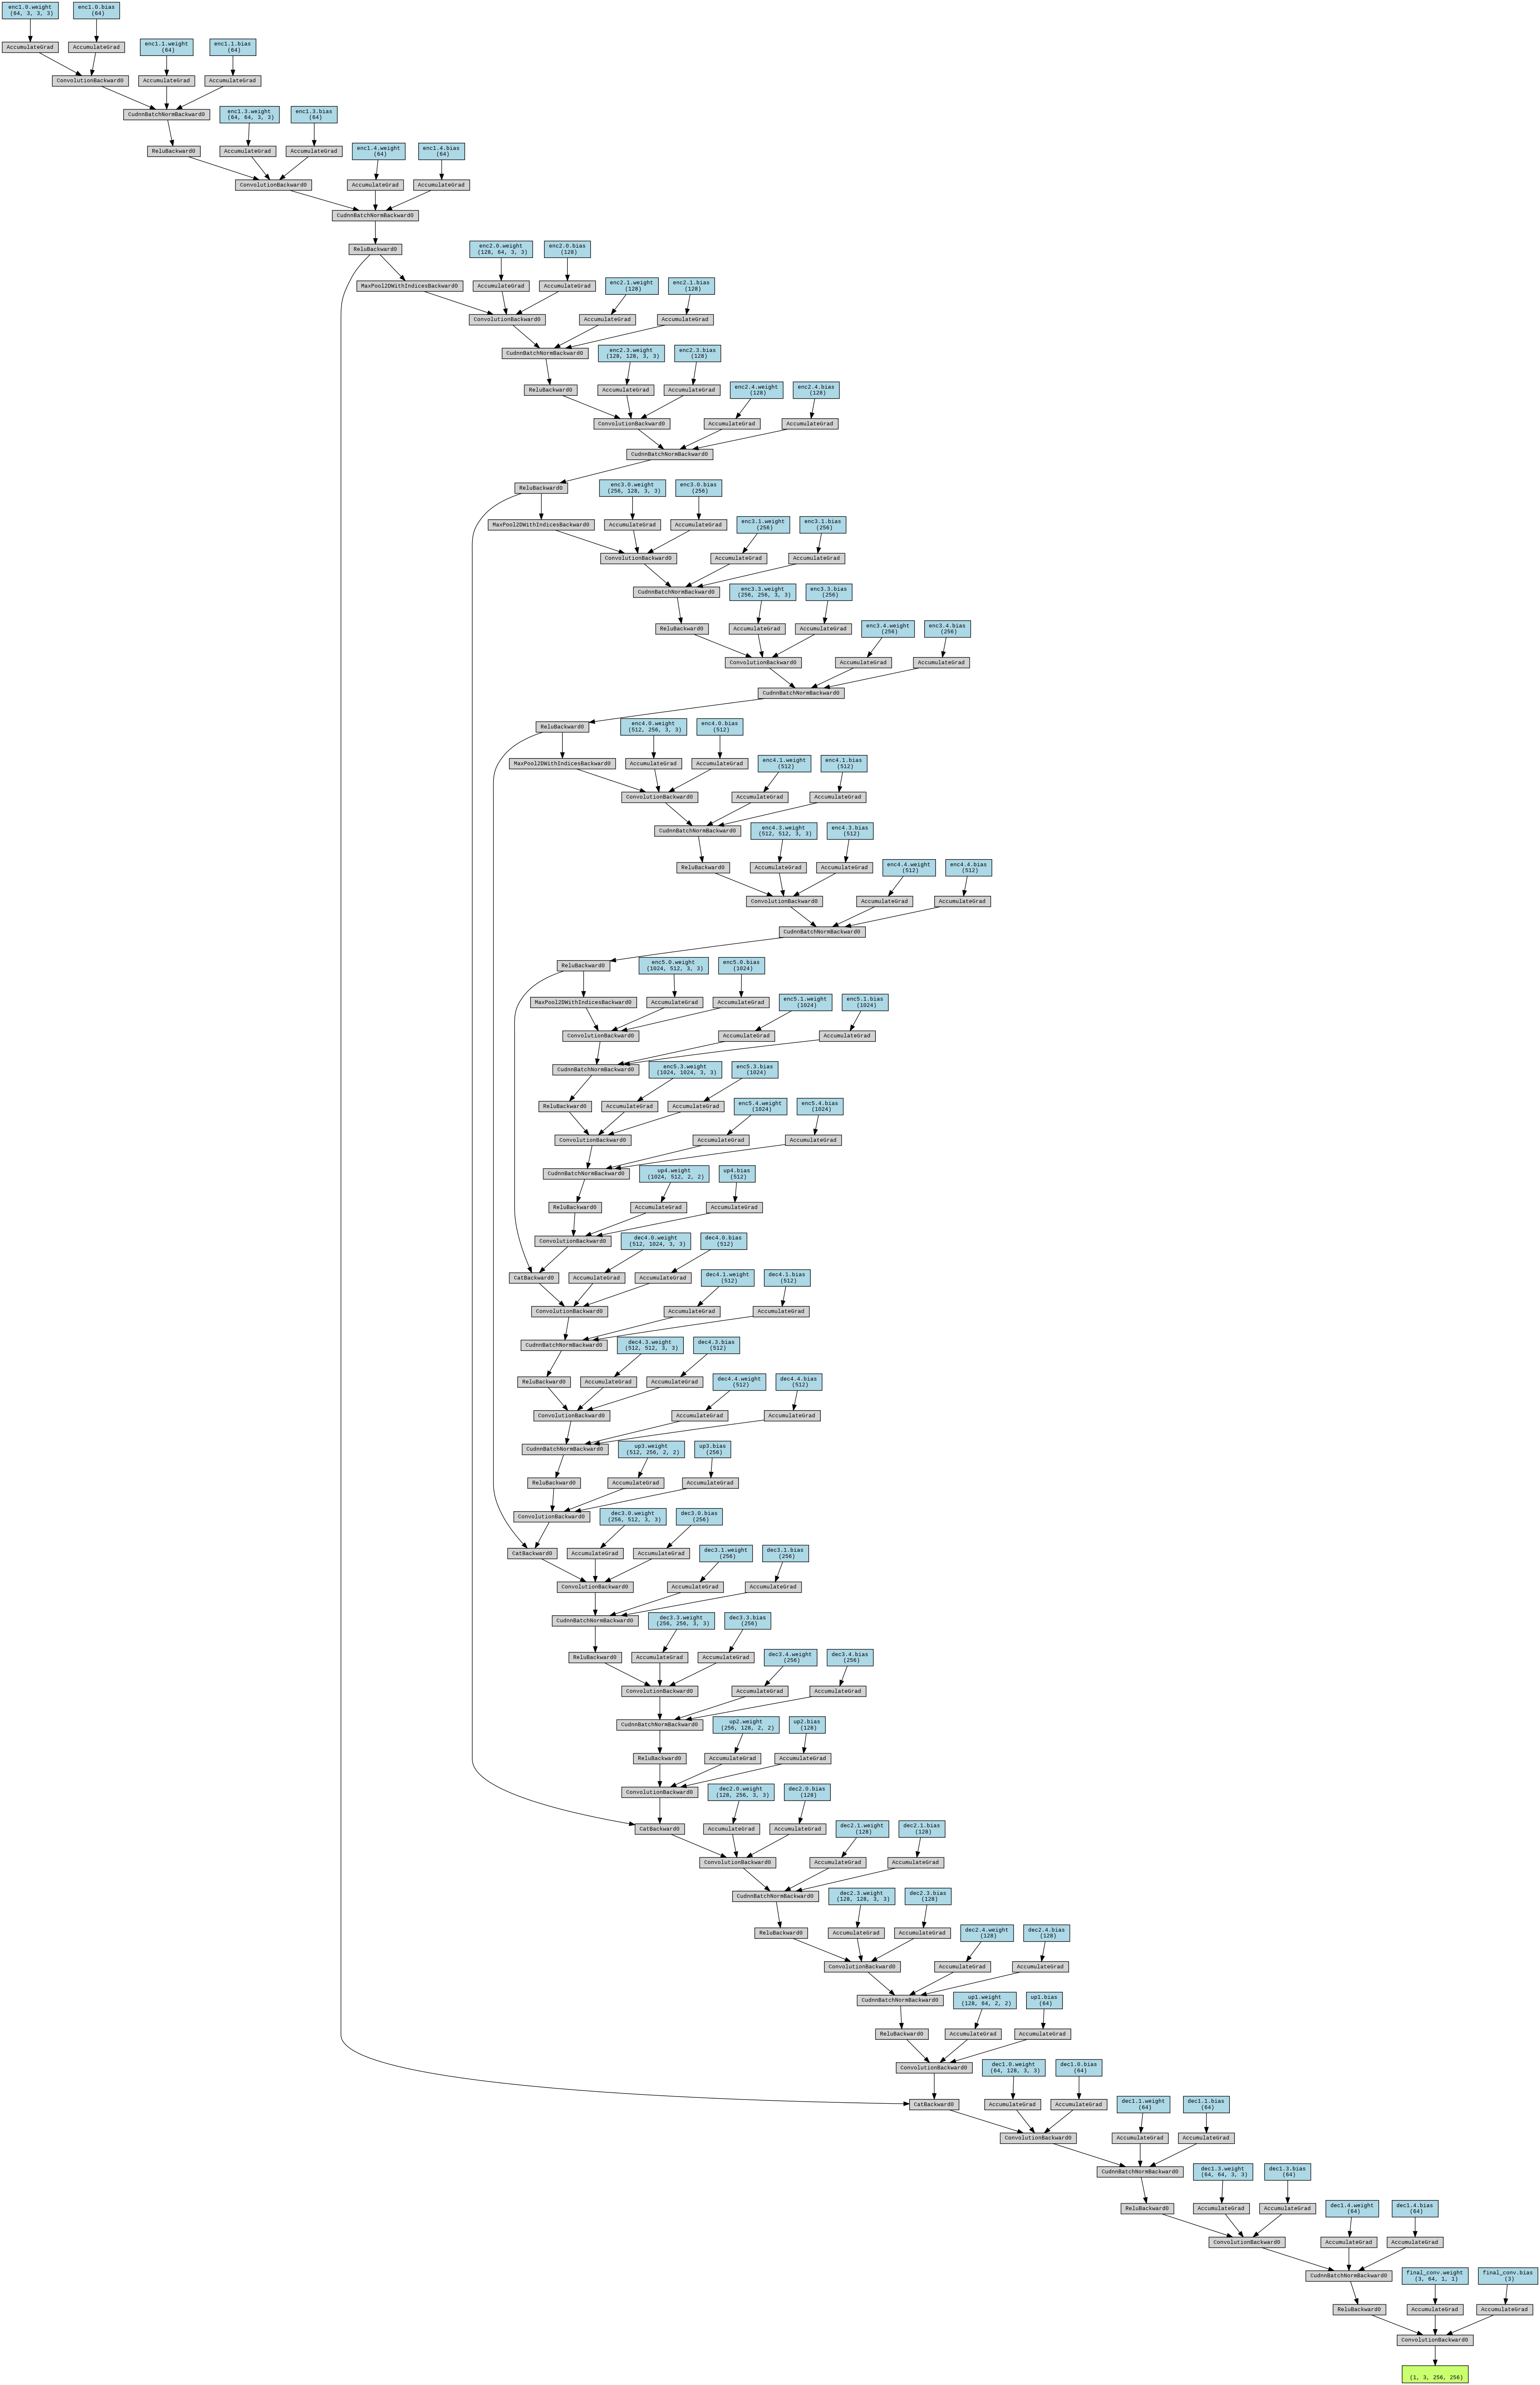

In [ ]:
# torchviz 설치 (주피터 노트북이나 구글 코랩에서 실행하는 경우)
# !pip install torchviz

from torchviz import make_dot
from IPython.display import Image as IPyImage

# 모델 구조 시각화
dummy_input = torch.randn(1, 3, 256, 256).to(device)
output = model(dummy_input)

# 그래프 생성 및 저장
graph = make_dot(output, params=dict(model.named_parameters()))
graph.render("unet_model", format="png")

# 이미지 표시
IPyImage(filename="unet_model.png")

### Step 6: 손실 함수와 옵티마이저 설정

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Step 7: 모델 학습

In [ ]:
from torch.optim.lr_scheduler import StepLR
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # 학습률 스케줄러 설정

num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for i, (images, masks) in enumerate(train_loader):
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (i+1) % 50 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    average_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}')

    # 학습률 업데이트
    scheduler.step()

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()
    average_val_loss = val_loss / len(val_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {average_val_loss:.4f}')

Epoch [1/1], Step [50/1478], Loss: 0.9721
Epoch [1/1], Step [100/1478], Loss: 0.7862
Epoch [1/1], Step [150/1478], Loss: 0.6282
Epoch [1/1], Step [200/1478], Loss: 0.6437
Epoch [1/1], Step [250/1478], Loss: 0.6642
Epoch [1/1], Step [300/1478], Loss: 0.7261
Epoch [1/1], Step [350/1478], Loss: 0.6607
Epoch [1/1], Step [400/1478], Loss: 0.5513
Epoch [1/1], Step [450/1478], Loss: 0.6400
Epoch [1/1], Step [500/1478], Loss: 0.7843
Epoch [1/1], Step [550/1478], Loss: 0.6290
Epoch [1/1], Step [600/1478], Loss: 1.0418
Epoch [1/1], Step [650/1478], Loss: 0.5575
Epoch [1/1], Step [700/1478], Loss: 0.6588
Epoch [1/1], Step [750/1478], Loss: 0.5269
Epoch [1/1], Step [800/1478], Loss: 0.5466
Epoch [1/1], Step [850/1478], Loss: 0.5012
Epoch [1/1], Step [900/1478], Loss: 0.8100
Epoch [1/1], Step [950/1478], Loss: 0.6606
Epoch [1/1], Step [1000/1478], Loss: 0.5163
Epoch [1/1], Step [1050/1478], Loss: 0.6161
Epoch [1/1], Step [1100/1478], Loss: 0.5925
Epoch [1/1], Step [1150/1478], Loss: 0.6785
Epoch [1

### Step 8: 모델 평가 및 시각화

Validation Loss: 0.6609


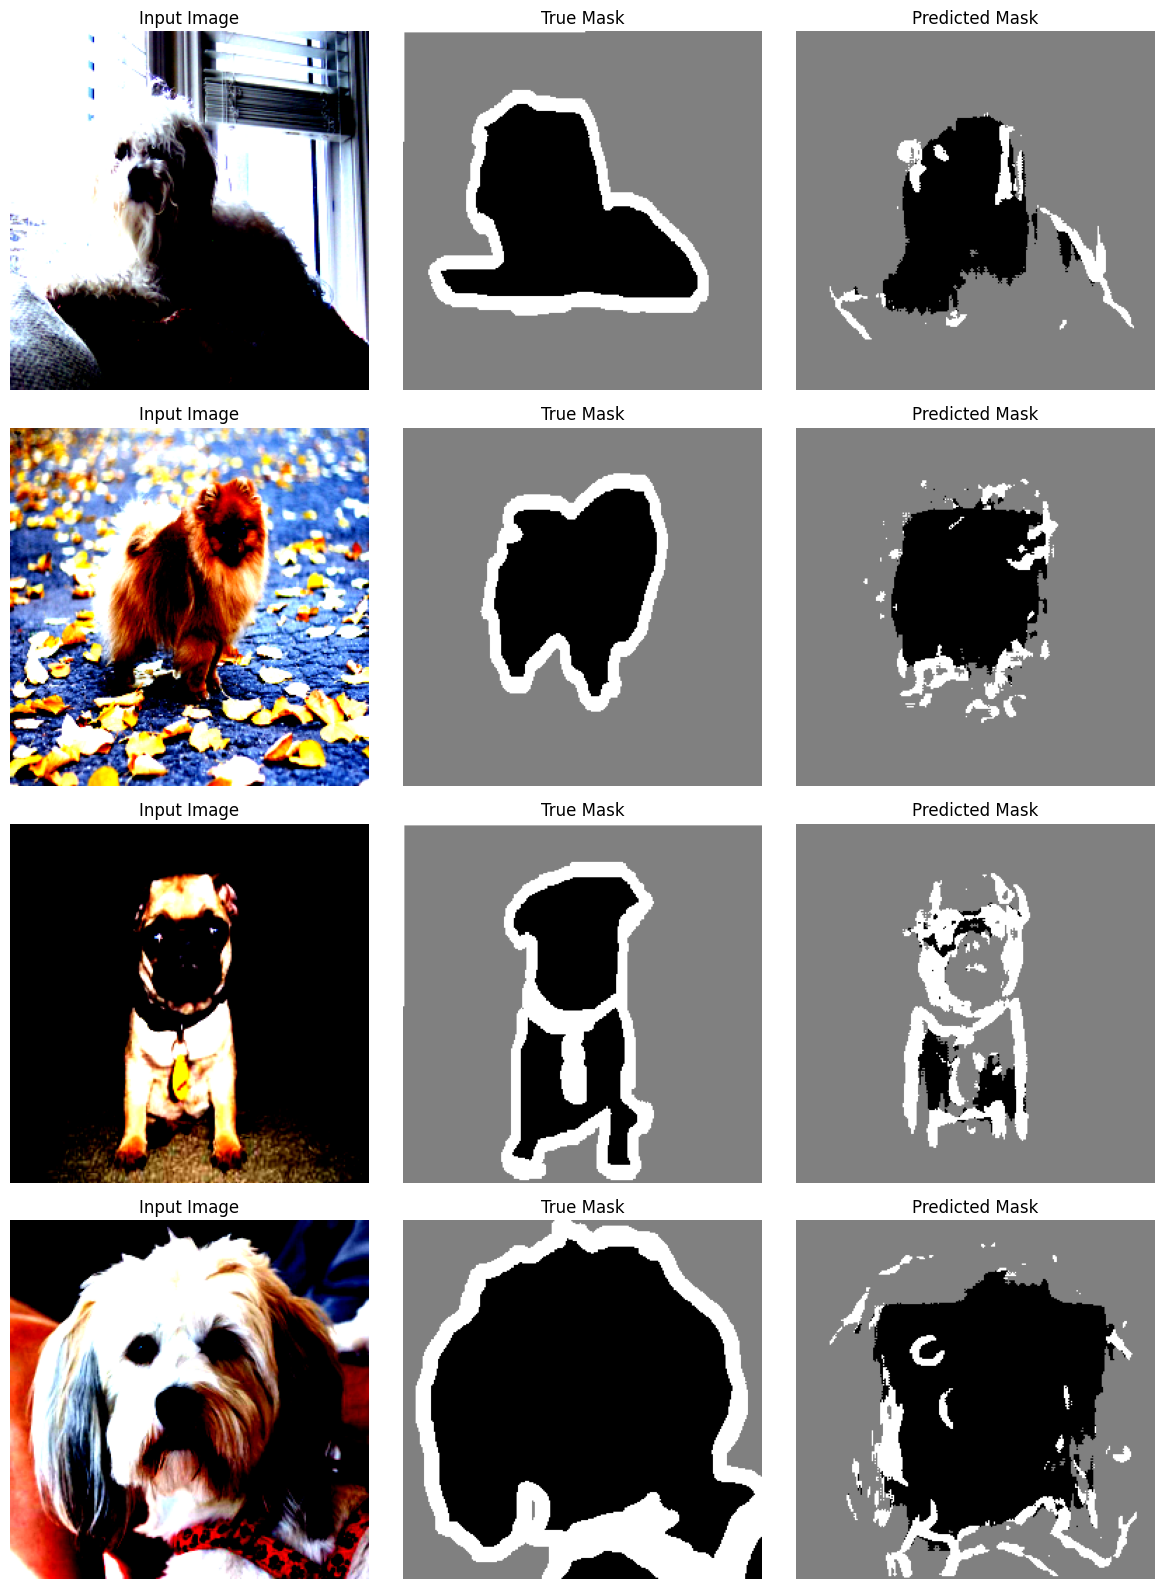

In [ ]:
def evaluate(model, dataloader, device):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for images, masks in dataloader:
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            total_loss += loss.item()
    average_loss = total_loss / len(dataloader)
    print(f'Validation Loss: {average_loss:.4f}')

def visualize_results(model, dataloader, device):
    model.eval()
    with torch.no_grad():
        images, masks = next(iter(dataloader))
        images = images.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1).cpu()
        images = images.cpu()
        masks = masks.cpu()

        fig, axes = plt.subplots(len(images), 3, figsize=(12, 4 * len(images)))
        for idx in range(len(images)):
            axes[idx, 0].imshow(images[idx].permute(1, 2, 0))
            axes[idx, 0].set_title('Input Image')
            axes[idx, 0].axis('off')
            axes[idx, 1].imshow(masks[idx], cmap='gray', vmin=0, vmax=2)
            axes[idx, 1].set_title('True Mask')
            axes[idx, 1].axis('off')
            axes[idx, 2].imshow(preds[idx], cmap='gray', vmin=0, vmax=2)
            axes[idx, 2].set_title('Predicted Mask')
            axes[idx, 2].axis('off')

        plt.tight_layout()
        plt.show()

# 최종 평가
evaluate(model, val_loader, device)

# 결과 시각화
visualize_results(model, val_loader, device)

여러분들이 보시기에 위의 결과가 어떠신가요?

뭔가 아쉽다고 판단이 되신다면, 위의 하이퍼 파라미터를 수정해보시면서 성능을 개선시켜보시고, 노션 페이지에 공유해주세요.

### 탐구 / 실습

1. 현재 U-Net을 기반으로 한 다양한 모델이 나왔습니다. 모델이 돌아가는 동안 다른 모델들에 대해서 찾아보시고, 노션 페이지에 공유해주세요.

## DeepLab 시리즈 이해하기

DeepLab은 이미지 세그멘테이션 분야에서 높은 성능을 보이는 딥러닝 모델 시리즈입니다. 현재까지 총 4번의 개정판이 발표되었으며, 각각 DeepLab V1(ICLR 2015), DeepLab V2(TPAMI 2017), DeepLab V3(arXiv 2017), 그리고 DeepLab V3+(arXiv 2018)입니다.

DeepLab 시리즈는 Semantic Segmentation 문제를 해결하기 위해 atrous convolution을 적극적으로 활용하는 방법을 제안하고 있습니다. V1에서는 atrous convolution을 처음으로 적용했고, V2에서는 멀티스케일 컨텍스트를 적용하기 위해 Atrous Spatial Pyramid Pooling (ASPP) 기법을 제안했습니다. V3에서는 기존 ResNet 구조에 atrous convolution을 활용해 더 밀집한 특징 맵을 얻는 방법을 제안했으며, 가장 최근에 발표된 V3+에서는 separable convolution과 atrous convolution을 결합한 atrous separable convolution의 활용을 제안하고 있습니다.

- [DeepLab V3+: Semantic Image Segmentation 모델](https://modulabs.co.kr/blog/deeplab-v3-semantic-image-segmentation-model/)

### 1. DeepLab V1

[Paper](https://arxiv.org/abs/1412.7062)

#### Atrous Convolution

<img src="https://blog.kakaocdn.net/dn/cHdL6S/btszf0rByjc/vOeq229pZ6LHB4b5D3Cta1/img.png">

DeepLab V1에서는 Atrous Convolution이라는 확장된 합성곱을 도입하여 입력 이미지의 해상도를 유지하면서도 더 넓은 시야를 가질 수 있도록 했습니다.

Atrous convolution은 기존의 convolution과 달리 필터 내부에 빈 공간을 두고 작동하는데, 빈 공간의 크기를 결정하는 파라미터인 rate r=1일 경우에는 기존의 convolution과 동일하게 작동하고, r 값이 커질수록 빈 공간이 넓어집니다.

이러한 방식의 장점은 기존 convolution과 동일한 양의 파라미터와 계산량을 유지하면서도, 한 픽셀이 볼 수 있는 영역인 field of view를 넓힐 수 있다는 점입니다.

또한 후처리 단계에서 Conditional Random Field (CRF)를 적용하여 분할 결과를 개선했다고 합니다.

- [딥러닝에서 사용되는 여러 유형의 Convolution 소개](https://zzsza.github.io/data/2018/02/23/introduction-convolution/)

### DeepLab V2

[Paper](https://arxiv.org/abs/1606.00915)

#### Spatial Pyramid Pooling(SPP)

<img src="https://www.researchgate.net/publication/346029751/figure/fig3/AS:1005265386225664@1616685353148/Illustration-of-atrous-spatial-pyramid-pooling.png">

DeepLab V2에서는 Spatial Pyramid Pooling 기반의 ASPP 모듈을 도입했습니다.

이는 여러 개의 다른 rate를 가진 receptive field를 병렬식으로 Atrous Convolution을 feature map에 적용한 후 이를 다시 결합하는 방식입니다.

이를 통해 객체 크기에 강인한 특징을 추출할 수 있게 되었으며, VGG-16 모델을 기반으로 하고 있습니다.

### DeepLab V3

[Paper](https://arxiv.org/abs/1706.05587)

DeepLab V3에서는 ResNet을 기반으로 Atrous Convolution을 활용하고, ASPP 모듈을 개선했으며, Batch Normalization을 적용하여 학습 안정성을 높였습니다.

Decoder로는 Bilinear Upsampling을 사용했다고 합니다.

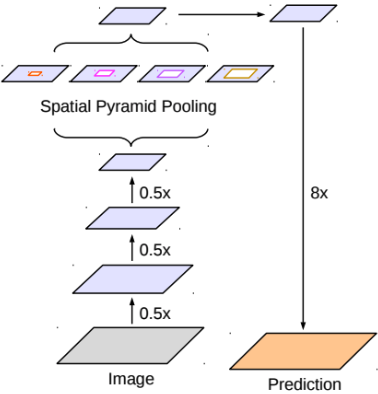

### DeepLab V3+

[Paper](https://arxiv.org/pdf/1802.02611.pdf)

마지막으로 DeepLab V3+에서는 기존 V3와 비교하여 크게 세 가지 변화가 있었습니다.

첫째, encoder를 ResNet에서 Xception으로 변경하여 separable convolution을 적극 활용했습니다.

둘째, ASPP를 ASSPP(Atrous Separable Spatial Pyramid Pooling)로 개선했습니다.

셋째, decoder를 단순한 bilinear upsampling에서 U-Net 스타일의 decoder로 변경했습니다.

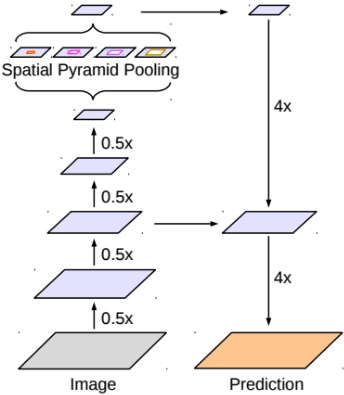

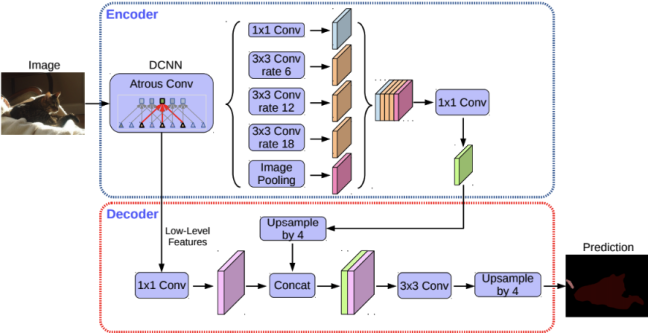

실험 결과를 보면, ResNet-101 구조를 encoder로 사용했을 때보다 Xception을 사용했을 때 약 2% 더 높은 성능을 보였으며, decoder를 U-Net 구조로 변경했을 때는 mIOU가 1.64% 향상되었습니다. 또한 모든 convolution을 separable convolution으로 대체했을 때도 성능은 유지되면서 연산량이 크게 줄어드는 것을 확인할 수 있었습니다.

<img src='https://modulabs.co.kr/wp-content/uploads/2024/06/table3.png'>

<img src='https://modulabs.co.kr/wp-content/uploads/2024/06/table5.png'>

<img src='https://modulabs.co.kr/wp-content/uploads/2024/06/fig6.png'>

DeepLab V3+는 Google에 소속된 연구진들이 개발했기 때문에 TensorFlow에서 공식적으로 제공하는 대표적인 시맨틱 세그멘테이션 방법으로 소개되고 있으며, 코드도 깔끔하게 공식적으로 공개되어 있습니다.

다양한 데이터셋과 여러 encoder 구조로 학습된 사전 학습 모델도 제공되어 있어, 시맨틱 세그멘테이션 모델을 구축하고자 하는 경우 매우 좋은 선택이 될 수 있습니다.

## DeepLab V3+를 활용한 CIHP 데이터셋 세그멘테이션 구현

이번에는 DeepLab V3+ 모델을 사용하여 Crowd Instance-level Human Parsing (CIHP) 데이터셋의 사람 이미지에 대한 세그멘테이션을 수행합니다.

DeepLab V3+는 인코더-디코더 구조를 갖추고 있으며, 다양한 스케일의 컨텍스트 정보를 효과적으로 활용하기 위해 Atrous Convolution과 ASPP (Atrous Spatial Pyramid Pooling) 기법을 사용합니다.

### DeepLab V3+의 주요 특징

1. Encoder

    - Atrous Convolution: 확장된 컨볼루션으로, 필터 내부에 빈 공간을 두어 Receptive Field를 확장합니다.
    - ASPP (Atrous Spatial Pyramid Pooling): 다양한 확장률(Dilation Rate)을 가진 병렬 컨볼루션을 통해 멀티스케일의 컨텍스트 정보를 캡처합니다.

2. Decoder

- 저수준 특징과 고수준 특징의 결합: U-Net 스타일의 스킵 연결을 통해 인코더의 저수준 특징을 디코더에 전달하여 해상도를 복원하고 경계 정보를 보존합니다.

3. 멀티스케일 컨텍스트 정보 활용

- 다양한 스케일의 컨텍스트 정보를 효과적으로 활용하여 정확한 세그멘테이션 결과를 제공합니다.

### CIHP(Crowd Instance-level Human Parsing) 데이터셋

38,280개의 다양한 인간 이미지로 구성된 데이터셋으로, 사람의 각 부분을 세밀하게 분할하는 데 사용됩니다.

### Step 1. 필요한 라이브러리 import

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.io

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

# GPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


### Step 2: DeepLab V3+ 모델 정의

#### 2.1 백본 모델: ResNet50

In [ ]:
# 사전 훈련된 ResNet50 로드
resnet = models.resnet50(pretrained=True)

torchvision에서 제공하는 사전 훈련된 ResNet50 모델을 백본으로 사용합니다.

#### 2.2 DeepLab V3+ 모델 구현

In [ ]:
class DeepLabV3Plus(nn.Module):
    def __init__(self, n_classes):
        super(DeepLabV3Plus, self).__init__()

        # 백본 모델의 레이어 가져오기
        self.backbone = models.resnet50(pretrained=True)

        # 필요 없는 레이어 제거
        self.backbone = nn.Sequential(*list(self.backbone.children())[:-2])

        # 저수준 특징 추출 레이어 설정 ('layer3'에 해당)
        self.low_level_layer = self.backbone[6]

        # ASPP 모듈 정의
        self.aspp = ASPP(in_channels=2048, out_channels=256)

        # 디코더 모듈 정의
        self.decoder = Decoder(num_classes=n_classes, low_level_channels=1024)

    def forward(self, x):
        # 인코더 (백본)
        x = self.backbone[:7](x)  # Conv1 ~ Layer3까지
        low_level_feat = x  # 저수준 특징 저장

        x = self.backbone[7](x)  # Layer4

        # ASPP 모듈
        x = self.aspp(x)

        # 디코더 모듈
        x = self.decoder(x, low_level_feat)

        # 출력 크기 조정
        x = F.interpolate(x, size=(x.shape[2]*4, x.shape[3]*4), mode='bilinear', align_corners=False)

        return x

# ASPP 모듈 정의
class ASPP(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ASPP, self).__init__()
        self.atrous_block1 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        self.atrous_block6 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=6, dilation=6, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        self.atrous_block12 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=12, dilation=12, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        self.atrous_block18 = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=18, dilation=18, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        self.global_avg_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU()
        )
        self.conv1 = nn.Conv2d(out_channels*5, out_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        size = x.shape[2:]
        x1 = self.atrous_block1(x)
        x2 = self.atrous_block6(x)
        x3 = self.atrous_block12(x)
        x4 = self.atrous_block18(x)
        x5 = self.global_avg_pool(x)
        x5 = F.interpolate(x5, size=size, mode='bilinear', align_corners=False)
        x = torch.cat([x1, x2, x3, x4, x5], dim=1)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        return self.dropout(x)

# 디코더 모듈 정의
class Decoder(nn.Module):
    def __init__(self, num_classes, low_level_channels):
        super(Decoder, self).__init__()
        self.conv1 = nn.Conv2d(low_level_channels, 48, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(48)
        self.relu = nn.ReLU()

        self.last_conv = nn.Sequential(
            nn.Conv2d(304, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, num_classes, kernel_size=1)
        )

    def forward(self, x, low_level_feat):
        low_level_feat = self.conv1(low_level_feat)
        low_level_feat = self.bn1(low_level_feat)
        low_level_feat = self.relu(low_level_feat)

        x = F.interpolate(x, size=low_level_feat.shape[2:], mode='bilinear', align_corners=False)
        x = torch.cat((x, low_level_feat), dim=1)
        x = self.last_conv(x)
        return x

- DeepLabV3Plus 클래스: 전체 모델을 정의하며, 인코더(백본), ASPP 모듈, 디코더로 구성됩니다.

    - 백본 모델: ResNet50의 마지막 두 레이어를 제외하고 사용하여 특징을 추출합니다.
    - 저수준 특징: 인코더의 중간 레이어(layer3의 출력)를 사용하여 디코더에서 해상도를 복원합니다.

- ASPP 클래스: 다양한 확장률(Dilation Rate)을 가진 컨볼루션 블록들을 병렬로 적용하여 멀티스케일 특징을 추출합니다.
    - atrous_block1: 일반 컨볼루션
    - atrous_block6, atrous_block12, atrous_block18: 확장률이 각각 6, 12, 18인 Atrous Convolution
    - global_avg_pool: 전역 평균 풀링을 사용하여 글로벌 컨텍스트 정보를 추가합니다.

- Decoder 클래스: 저수준 특징과 고수준 특징을 결합하여 최종 세그멘테이션 출력을 생성합니다.
    - 저수준 특징의 채널 수를 조정하고, 인코더의 출력과 결합합니다.
    - 두 특징을 결합한 후 여러 합성곱 블록을 통해 최종 출력을 생성합니다.

### Step 3: 데이터셋 클래스 정의

In [ ]:
class CIHPDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, target_transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.target_transform = target_transform

        self.image_list = sorted(os.listdir(self.image_dir))
        self.mask_list = sorted(os.listdir(self.mask_dir))

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        # 이미지 및 마스크 경로
        img_path = os.path.join(self.image_dir, self.image_list[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_list[idx])

        # 이미지 및 마스크 로드
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path)

        # Transform 적용
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            mask = self.target_transform(mask)
        else:
            mask = np.array(mask, dtype=np.int64)

        return image, mask

Current Directory Content:
['.config', 'test-volume.tif', 'annotations', 'ICCV15_fashion_dataset(ATR)', 'unet_model', 'instance-level_human_parsing.zip', 'instance-level_human_parsing', 'train-volume.tif', 'train-labels.tif', 'ISBI-2012-challenge.zip', 'images.tar.gz', 'results', 'challenge-error-metrics.bsh', 'dataset', 'unet_model.png', 'test-labels.tif', 'images', 'annotations.tar.gz', 'sample_data']

Contents of 'instance-level_human_parsing':
['instance-level_human_parsing']

Image Directory Exists: True
Mask Directory Exists: True

Contents of image_dir:
['0032084.jpg', '0017199.jpg', '0022869.jpg', '0009706.jpg', '0000040.jpg']

Contents of mask_dir:
['0016388.png', '0010473.png', '0030956.png', '0010226.png', '0031255.png']


### Step 4: 데이터 다운로드 및 준비

#### 4.1 데이터셋 다운로드

In [ ]:
# gdown 설치 (필요한 경우)
!pip install gdown

import gdown

# 데이터셋 다운로드
url = 'https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz'
output = 'instance-level_human_parsing.zip'
gdown.download(url, output, quiet=False)

#### 4.2 데이터셋 압축 해제

Image shape: torch.Size([3, 512, 512])
Mask shape: torch.Size([512, 512])


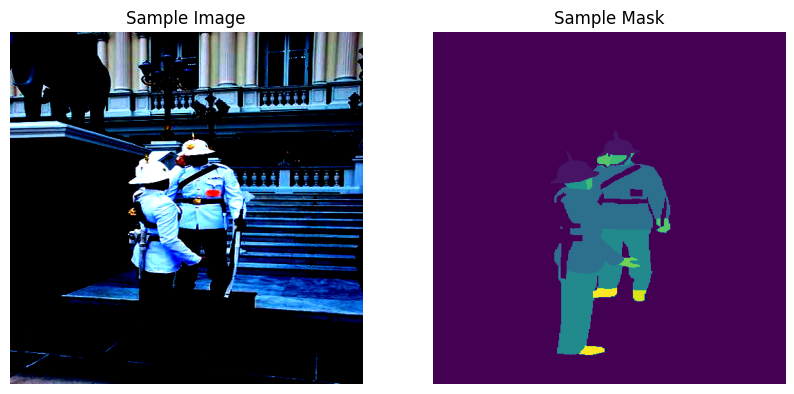

In [ ]:
import zipfile

# 압축 해제
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('./')

#### 4.3 데이터 경로 설정 및 확인

In [ ]:
# 압축 해제 후 디렉토리 구조 확인
import os

# 최상위 디렉토리 확인
print("Current Directory Content:")
print(os.listdir('./'))

# instance-level_human_parsing 디렉토리 내용 확인
print("\nContents of 'instance-level_human_parsing':")
print(os.listdir('./instance-level_human_parsing'))

# 실제 데이터 경로 설정 (중첩된 디렉토리 반영)
data_dir = './instance-level_human_parsing/instance-level_human_parsing/Training'
image_dir = os.path.join(data_dir, 'Images')
mask_dir = os.path.join(data_dir, 'Category_ids')
colormap_path = './instance-level_human_parsing/instance-level_human_parsing/human_colormap.mat'

# 디렉토리 존재 여부 확인
print(f"\nImage Directory Exists: {os.path.exists(image_dir)}")
print(f"Mask Directory Exists: {os.path.exists(mask_dir)}")

# 디렉토리 내용 확인
print("\nContents of image_dir:")
print(os.listdir(image_dir)[:5])  # 첫 5개 파일만 출력

print("\nContents of mask_dir:")
print(os.listdir(mask_dir)[:5])  # 첫 5개 파일만 출력

#### 4.4 데이터 변환 정의 및 데이터로더 생성


In [ ]:
# 이미지 변환
image_transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet 기준값 사용
                         std=[0.229, 0.224, 0.225])
])

# 마스크 변환
def mask_transform(mask):
    mask = mask.resize((512, 512), resample=Image.NEAREST)
    mask = np.array(mask, dtype=np.int64)
    return torch.from_numpy(mask)

# 전체 데이터셋 로드
dataset = CIHPDataset(image_dir, mask_dir, transform=image_transform, target_transform=mask_transform)

# 데이터셋 분할 (훈련:검증 = 8:2)
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# 데이터로더 생성
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### Step 5: 모델 초기화 및 시각화

In [ ]:
num_classes = 20  # CIHP 데이터셋의 클래스 수 (배경 포함)

model = DeepLabV3Plus(n_classes=num_classes).to(device)
print(model)

### Step 6: 손실 함수와 옵티마이저 설정

In [ ]:
criterion = nn.CrossEntropyLoss(ignore_index=255)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

### Step 7: 모델 학습

In [ ]:
num_epochs = 1  # 학습 시간을 고려하여 1 epoch로 설정 (실제 실험에서는 더 늘려야 함)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # 검증 단계
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    print(f"Validation Loss: {val_loss:.4f}")


### Step 8: 모델 평가 및 시각화

#### 8.1 human_colormap.mat 로드

In [ ]:
colormap = scipy.io.loadmat(colormap_path)['colormap']
colormap = (colormap * 255).astype(np.uint8)

Epoch [1/1], Loss: 0.5771
Validation Loss: 0.4629


MATLAB 파일인 human_colormap.mat을 로드하여 각 클래스 인덱스에 대한 색상 맵을 가져옵니다.

### Step 6. 추론 및 결과 시각화

#### 8.2 결과 시각화 함수 정의

In [ ]:
def decode_segmap(label_mask, colormap):
    label_mask = label_mask.numpy()
    h, w = label_mask.shape
    output = np.zeros((h, w, 3), dtype=np.uint8)
    for label in np.unique(label_mask):
        if label == 255:
            continue
        output[label_mask == label] = colormap[label]
    return output


#### 8.3 추론 및 시각화

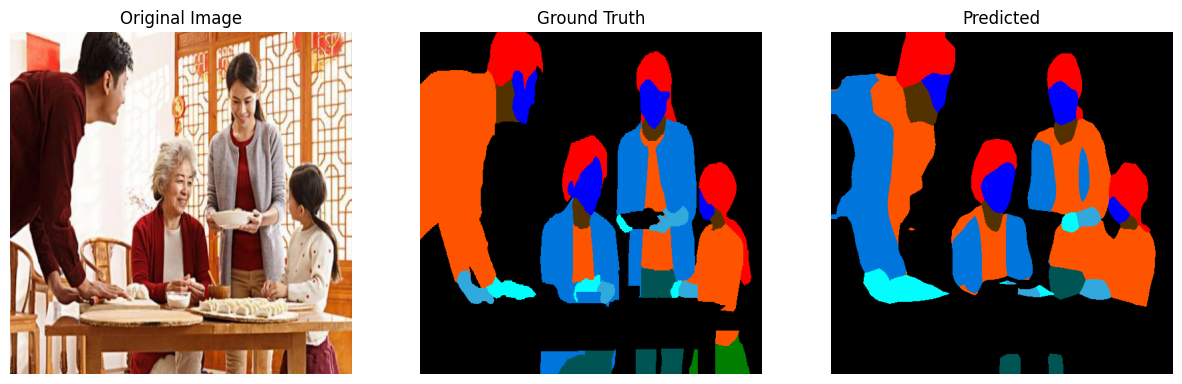

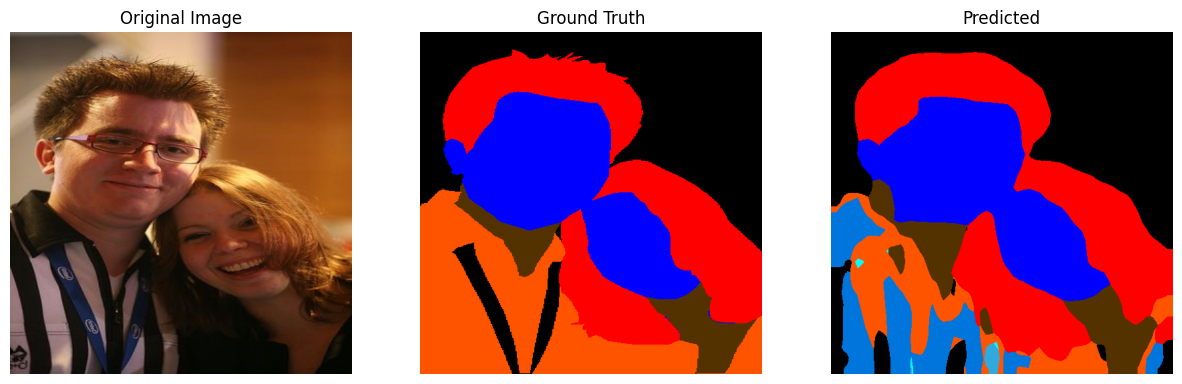

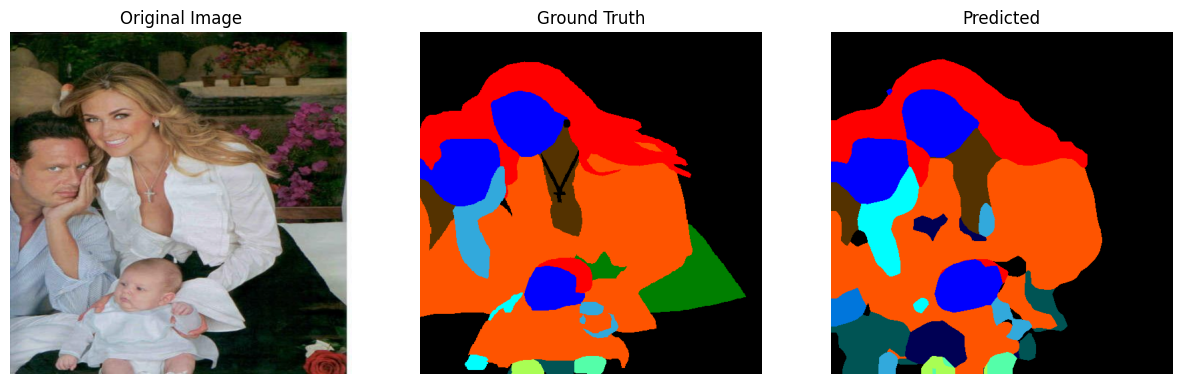

In [ ]:
model.eval()
with torch.no_grad():
    for idx in range(3):  # 샘플 3개만 시각화
        image, mask = val_dataset[idx]
        image_input = image.unsqueeze(0).to(device)
        output = model(image_input)
        pred = torch.argmax(output, dim=1).squeeze(0).cpu()

        # 원본 이미지
        orig_image = image.permute(1,2,0).cpu().numpy()
        orig_image = (orig_image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]))
        orig_image = (orig_image * 255).astype(np.uint8)

        # 마스크 디코딩
        decoded_mask = decode_segmap(pred, colormap)

        # 실제 마스크 디코딩
        true_mask = decode_segmap(mask, colormap)

        # 시각화
        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)
        plt.imshow(orig_image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(true_mask)
        plt.title('Ground Truth')
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(decoded_mask)
        plt.title('Predicted')
        plt.axis('off')

        plt.show()

- Plus Alpha

    - [YOLOv5 Segmentation Tutorial](https://colab.research.google.com/github/ultralytics/yolov5/blob/master/segment/tutorial.ipynb)
    - [How to Train YOLOv8 Instance Segmentation on a Custom Dataset](https://blog.roboflow.com/how-to-train-yolov8-instance-segmentation/)